# Exploratory Analysis of RAPTOR Metrics in the Modern NBA (1977-2023)

------
Presented by: Christopher Baker, Jonathan Carmichael, Jack Hayes, Wipawadee Naiyakhun, and Uzma Sayyeda


**Importing data and merging datasets**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import scipy.stats as st
import seaborn as sns
import plotly.graph_objects as go
from scipy.stats import linregress
import plotly.express as px
%matplotlib inline

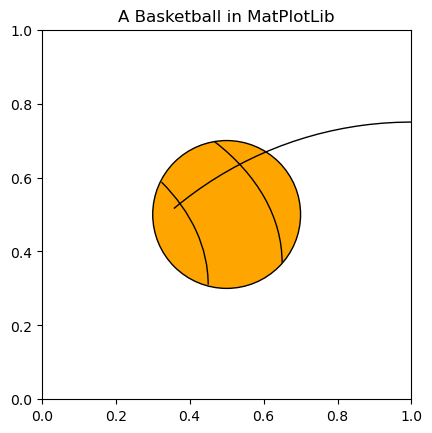

In [2]:
figure, axes = plt.subplots()

radius=1

basketball = plt.Circle((0.5 , 0.5), 0.2, facecolor="orange", edgecolor="black")
left_arc = Arc((-0.3, 0.31), radius*1.5, radius*1, color='black', theta1=0, theta2=24)
right_arc = Arc((-0.1, 0.37), radius*1.5, radius*1, color='black', theta1=0, theta2=30)
middle_arc1 = Arc((1, -0.25), radius*2, radius*2, color='black', theta1=0, theta2=130)

axes.set_aspect(1)
axes.add_artist(basketball)
axes.add_artist(left_arc)
axes.add_artist(right_arc)
axes.add_artist(middle_arc1)
plt.title( 'A Basketball in MatPlotLib' )
plt.show()

In [3]:
# Import our datasets
latest_df = pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")
historical_df = pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")

# Combine the data into a single dataset.
merged_df = pd.merge(historical_df, latest_df, how="outer")
merged_df.head()

player_name  player_id  season season_type team  poss    mp  \
0  Kareem Abdul-Jabbar  abdulka01    1977          PO  LAL  1020   467   
1  Kareem Abdul-Jabbar  abdulka01    1977          RS  LAL  6654  3016   
2      Zaid Abdul-Aziz  abdulza01    1977          RS  BUF   441   195   
3        Tom Abernethy  abernto01    1977          PO  LAL   467   214   
4        Tom Abernethy  abernto01    1977          RS  LAL  3040  1378   

   raptor_offense  raptor_defense  raptor_total  ...  predator_offense  \
0        6.350694        3.288313      9.639006  ...          6.592019   
1        4.267101        3.075579      7.342679  ...          4.482404   
2       -1.926415       -0.368835     -2.295249  ...         -1.817927   
3        0.024715       -0.825643     -0.800928  ...         -0.565843   
4        0.517829       -0.459991      0.057838  ...          0.141415   

   predator_defense  predator_total  pace_impact  raptor_box_offense  \
0          3.065131        9.657150    -0.432080                 NaN   
1          2.556956        7.039361    -0.513828                 NaN   
2         -1.624327       -3.442253    -0.751147                 NaN   
3         -1.695077       -2.260920    -0.425337                 NaN   
4         -0.835555       -0.694139    -0.315821                 NaN   

   raptor_box_defense  raptor_box_total  raptor_onoff_offense  \
0                 NaN               NaN                   NaN   
1                 NaN               NaN                   NaN   
2                 NaN               NaN                   NaN   
3                 NaN               NaN                   NaN   
4                 NaN               NaN                   NaN   

   raptor_onoff_defense  raptor_onoff_total  
0                   NaN                 NaN  
1                   NaN                 NaN  
2                   NaN                 NaN  
3                   NaN                 NaN  
4                   NaN                 NaN  

[5 rows x 23 columns]

**Cleaning Merged Dataframe**

In [4]:
# removing null data
# raptor_box and raptor_onoff are only for 2013-onward

merged_df.fillna(0, inplace=True)
clean_df = merged_df
clean_df.isnull().sum()
clean_df.head()

player_name  player_id  season season_type team  poss    mp  \
0  Kareem Abdul-Jabbar  abdulka01    1977          PO  LAL  1020   467   
1  Kareem Abdul-Jabbar  abdulka01    1977          RS  LAL  6654  3016   
2      Zaid Abdul-Aziz  abdulza01    1977          RS  BUF   441   195   
3        Tom Abernethy  abernto01    1977          PO  LAL   467   214   
4        Tom Abernethy  abernto01    1977          RS  LAL  3040  1378   

   raptor_offense  raptor_defense  raptor_total  ...  predator_offense  \
0        6.350694        3.288313      9.639006  ...          6.592019   
1        4.267101        3.075579      7.342679  ...          4.482404   
2       -1.926415       -0.368835     -2.295249  ...         -1.817927   
3        0.024715       -0.825643     -0.800928  ...         -0.565843   
4        0.517829       -0.459991      0.057838  ...          0.141415   

   predator_defense  predator_total  pace_impact  raptor_box_offense  \
0          3.065131        9.657150    -0.432080                 0.0   
1          2.556956        7.039361    -0.513828                 0.0   
2         -1.624327       -3.442253    -0.751147                 0.0   
3         -1.695077       -2.260920    -0.425337                 0.0   
4         -0.835555       -0.694139    -0.315821                 0.0   

   raptor_box_defense  raptor_box_total  raptor_onoff_offense  \
0                 0.0               0.0                   0.0   
1                 0.0               0.0                   0.0   
2                 0.0               0.0                   0.0   
3                 0.0               0.0                   0.0   
4                 0.0               0.0                   0.0   

   raptor_onoff_defense  raptor_onoff_total  
0                   0.0                 0.0  
1                   0.0                 0.0  
2                   0.0                 0.0  
3                   0.0                 0.0  
4                   0.0                 0.0  

[5 rows x 23 columns]

**Defining Functions**

In [5]:
## bar plot

def bar_plot(x_axis, y_axis, xlabel, ylabel, title, size):
    fig, ax = plt.subplots(figsize=(size))
    bar_container= ax.bar(x_axis, y_axis, alpha=0.5, color="#F94C10")
    ax.bar_label(bar_container, fmt='{:,.0f}')
    plt.xlabel(xlabel, weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"Top 20 {title}", weight="bold")
    plt.xticks(rotation=45)

    plt.show()

In [6]:
## linear regression

def regression_plot(x_axis, y_axis, xlabel, ylabel, text_coordinates, x=0, y=0):
    

    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_axis, y_axis, marker=r'8', c="#F94C10", s=50, alpha=0.7, edgecolor="#F94C10")
    plt.plot(x_axis, regress_values, "r:", alpha=0.5)
    plt.xlabel(xlabel, weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"{xlabel} vs {ylabel} by Teams", color="#F94C10", weight="bold")
    plt.grid(True, color="b", alpha=0.10)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="#F94C10")
    plt.annotate(line_eq, xy=(x, y), xycoords='axes fraction', fontsize=10, color="red")
    print(f"The r-value is: {rvalue**2}")
    for team, txt in enumerate(team_names):
        plt.annotate(txt, (x_axis[team], y_axis[team]), color="#F94C10",alpha=0.5)
        
    plt.show()

In [7]:
## Seaborn bar plot function

def sns_bar_plot(data,x,y,title,xlabel,ylabel):
    
    f, (ax) = plt.subplots(figsize=(15,7))
    sns.set_theme(style="white", context="notebook",font_scale=0.9)

    sns.barplot(x=x,
                y=y,
                data=data,
                palette="autumn",
                alpha=0.7)

    for i in ax.containers:
        ax.bar_label(i,fmt="%.5s")
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, weight="bold")
    ax.axhline(0, color="k", clip_on=False)
    sns.despine(bottom=True)
    plt.show()

In [8]:
## make plotly scatter plot function

def int_scatter(data,x,y,color,title,ylabel):
    fig = px.scatter(data,
                 x=x,
                 y=y,
                 color=color,
                 color_continuous_scale=px.colors.sequential.YlOrRd,
                 size=y,
                 template="ggplot2",
                 title=title,
                 trendline="ols",
                 trendline_scope="overall",
                 trendline_color_override="#F94C10",
                 labels={"x": "Total RAPTOR Scores","y": ylabel},
                 hover_data=['player_name'])
    fig.update_layout(xaxis_title="Total RAPTOR Scores",
                      yaxis_title=ylabel,
                      legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="left",
                      x=0.01))
                 
                 
                 
    fig.show()

In [9]:
## bar_polar function

def polar_bar(data,color,title):

    fig=px.bar_polar(data,
                 r="Total_RAPTOR_Scores",
                 theta="player_name",
                 color=color,
                 color_continuous_scale=px.colors.sequential.YlOrRd,
                 template="ggplot2",
                 title=title)
    fig.show()

### Summary Statistics by Team

In [80]:
# group data by team and compute mean

total_players=clean_df.groupby("team")["player_name"].count()
raptor_total=clean_df.groupby("team")["raptor_total"].mean()
poss=clean_df.groupby("team")["poss"].mean()
war_total=clean_df.groupby("team")["war_total"].mean()
pace_impact=clean_df.groupby("team")["pace_impact"].mean()
raptor_onoff_total=clean_df.groupby("team")["raptor_onoff_total"].mean()
avg_mp_team=clean_df.groupby("team")["mp"].mean()
avg_raptor_offense=clean_df.groupby("team")["raptor_offense"].mean()
avg_raptor_defense=clean_df.groupby("team")["raptor_defense"].mean()
avg_predator_total=clean_df.groupby("team")["predator_total"].mean()



avg_summary = pd.DataFrame({"Total Players": total_players,
          "Raptor Total": raptor_total,
          "Predator Total": avg_predator_total,    
          "Possessions": poss,
          "War Total": war_total,
          "Pace Impact": pace_impact,
          "Minutes Played":avg_mp_team,
          "Raptor On and Off Totals":raptor_onoff_total,
          "RAPTOR Offense": avg_raptor_offense,           
          "RAPTOR Defense": avg_raptor_defense}).reset_index()
avg_summary.head()

team  Total Players  Raptor Total  Predator Total  Possessions  War Total  \
0  ATL           1185     -1.570031       -1.956244  1642.004219   1.140147   
1  BOS           1222     -1.199087       -1.613733  1704.759411   1.448069   
2  BRK            340     -1.191441       -1.734914  1366.402941   0.843397   
3  BUF             37     -2.715885       -2.881760  2382.189189   0.983682   
4  CHA            380     -2.366248       -2.844577  1938.507895   0.952573   

   Pace Impact  Minutes Played  Raptor On and Off Totals  RAPTOR Offense  \
0     0.263341      819.489451                  0.018678       -1.187607   
1     0.248033      838.174304                  0.033699       -1.130326   
2     0.275703      666.041176                 -0.316375       -1.077620   
3     0.180248     1068.513514                  0.000000       -1.835151   
4     0.133151      975.000000                 -0.145483       -1.909040   

   RAPTOR Defense  
0       -0.382423  
1       -0.068761  
2       -0.113821  
3       -0.880735  
4       -0.457208

In [94]:
# HIstogram of distribution of RAPTOR, WAR and PREDATOR 

x0=avg_summary["Raptor Total"]
x1=avg_summary["War Total"]
x3=avg_summary["Predator Total"]
y=avg_summary["team"]
fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,y=y,name='Raptor Total',marker_color="darkorange"))
fig.add_trace(go.Histogram(x=x1,y=y,name='War Total',marker_color="orange"))
fig.add_trace(go.Histogram(x=x3,y=y,name='Predator Total',marker_color="sandybrown"))

# Overlay both histograms
fig.update_layout(barmode='stack',title_text='Histogram of Raptor Total, War Total and Predator Total',
                  xaxis_title_text='Scores',
                  yaxis_title_text='Count',
                 template="ggplot2")
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

### Question 1: Do the amount of possessions per player greatly impact that player’s team's total RAPTOR ratings by season? Why or why not?

In [13]:
# defining a full list of players from both sets of data based on possessions and total RAPTOR scores

poss_raptor = clean_df.groupby(["player_name"])[["poss", "raptor_total"]].sum(numeric_only = None)
poss_raptor_df = pd.DataFrame(poss_raptor)

# reset index
poss_raptor_df = poss_raptor_df.reset_index()

# show
poss_raptor_df.head()

player_name   poss  raptor_total
0     A.C. Green  81445     -5.311204
1  A.J. Bramlett    123     -9.820485
2   A.J. English   6393     -8.779331
3    A.J. Guyton   2362    -16.723745
4    A.J. Lawson    239    -29.105705

In [14]:
# setting dataframe to label top 20 players by possession total

by_poss = poss_raptor_df.groupby(["player_name"])[["raptor_total", "poss"]].sum().sort_values(by="poss", ascending=False)
by_poss = by_poss.reset_index()
by_poss = by_poss.head(20)

In [15]:
# setting dataframe to label top 20 players by RAPTOR total

by_raptor = poss_raptor_df.groupby(["player_name"])[["poss", "raptor_total"]].sum().sort_values(by="raptor_total", ascending=False)
by_raptor = by_raptor.reset_index()
by_raptor = by_raptor.head(20)

**Top 20 Players by Possessions**

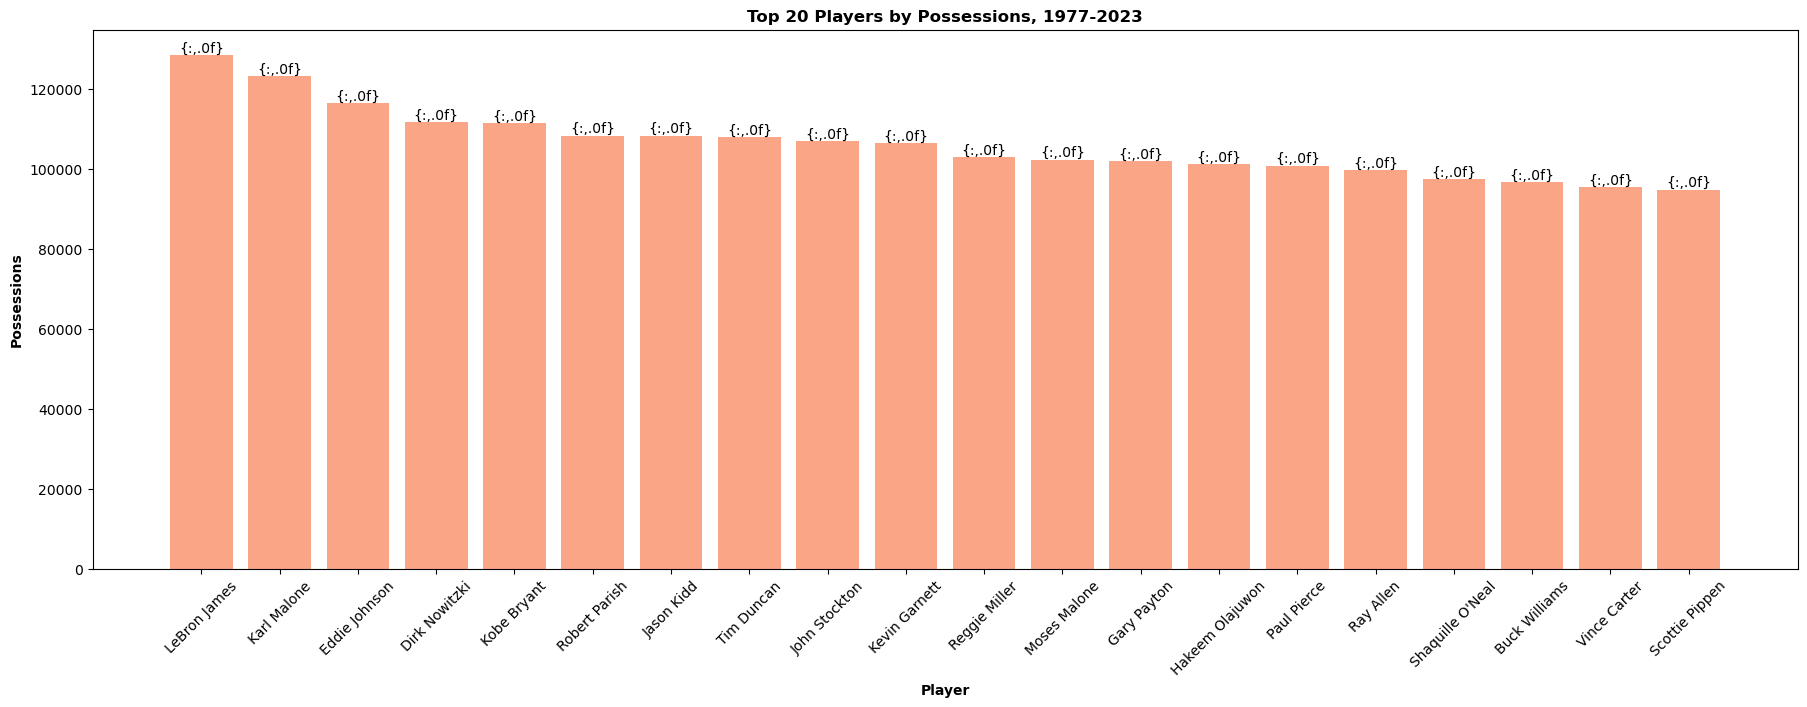

In [16]:
# Slice and sort

top_twenty_poss = poss_raptor_df[["player_name", "poss"]].\
sort_values(by="poss", ascending=False).head(20)

# Set up variables
poss = top_twenty_poss["poss"]
player_names = top_twenty_poss["player_name"]

# Generate Bar plot
bar_plot(player_names, poss, "Player", "Possessions", "Players by Possessions, 1977-2023", (22,7))

**Top 20 Players by RAPTOR Total**

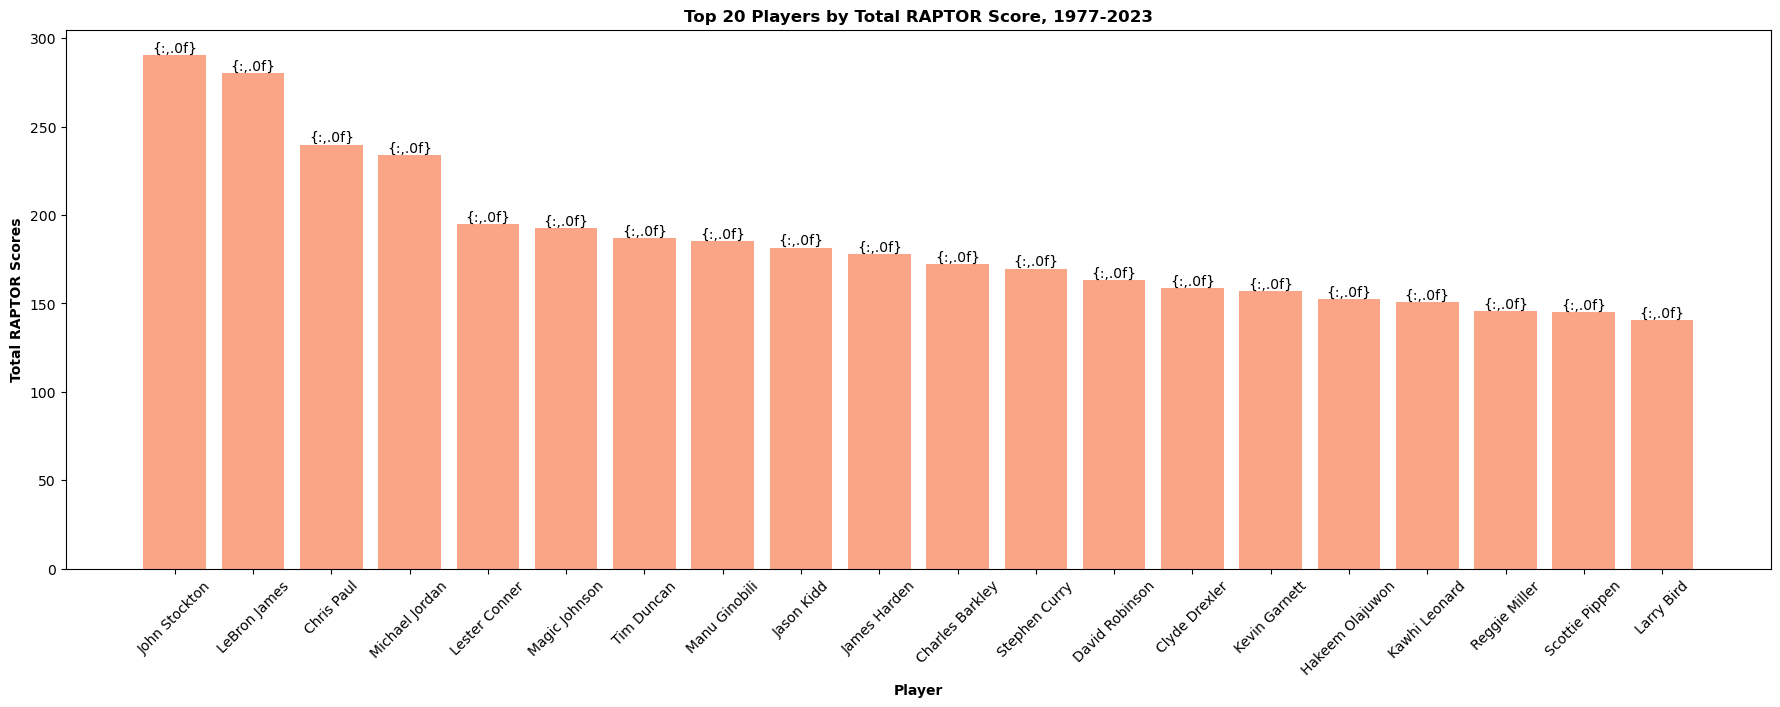

In [17]:
# Slice and sort
# graphing top players by RAPTOR total

top_twenty_raptor = poss_raptor_df[["player_name", "raptor_total"]].\
sort_values(by="raptor_total", ascending=False).head(20)

# Set up variables
raptor = top_twenty_raptor["raptor_total"]
player_names = top_twenty_raptor["player_name"]

# Generate Bar plot
bar_plot(player_names, raptor, "Player", "Total RAPTOR Scores", "Players by Total RAPTOR Score, 1977-2023", (22,7))

**Linear Regression for Total RAPTOR Score vs. Total Possessions**

In [18]:
# make a new dataframe to display by teams

total_players = clean_df.groupby("team")["player_name"].count()
raptor_total = clean_df.groupby("team")["raptor_total"].mean()
poss_total = clean_df.groupby("team")["poss"].mean()

team_poss_raptor = pd.DataFrame({"Total Players":total_players,
                                 "Total RAPTOR Score":raptor_total,
                                 "Total Possessions":poss_total})

team_poss_raptor.head()

Total Players  Total RAPTOR Score  Total Possessions
team                                                      
ATL            1185           -1.570031        1642.004219
BOS            1222           -1.199087        1704.759411
BRK             340           -1.191441        1366.402941
BUF              37           -2.715885        2382.189189
CHA             380           -2.366248        1938.507895

The r-value is: 0.19019525425278175


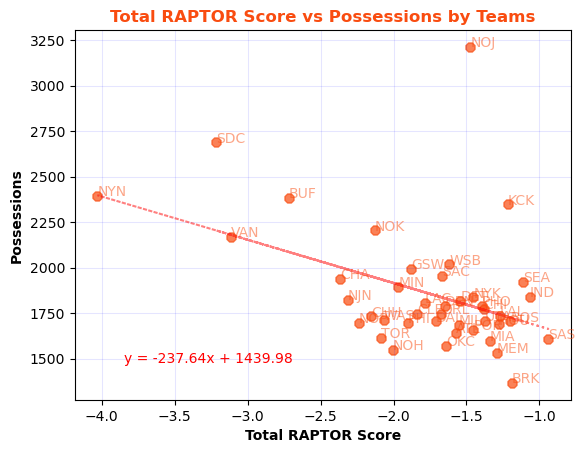

In [19]:
# linear regression for total RAPTOR score vs. total possessions

x_axis = avg_summary["Raptor Total"]
y_axis = avg_summary["Possessions"]
team_names = avg_summary["team"]

regression_plot(x_axis, y_axis, "Total RAPTOR Score", "Possessions", (-4,0.4), 0.1, 0.1)


## Question #2: Which team displayed the highest/lowest RAPTOR ratings across the 2022-23 season across all players? How does this data compare to their predictive PREDATOR model?

In [20]:
# Total Scores by Teams

raptor_team = latest_df.groupby("team")["raptor_total"].sum()
predator_team = latest_df.groupby("team")["predator_total"].sum()
raptor_offense = latest_df.groupby("team")["raptor_offense"].sum()
raptor_defense = latest_df.groupby("team")["raptor_defense"].sum()
predator_offense = latest_df.groupby("team")["predator_offense"].sum() 
predator_defense = latest_df.groupby("team")["predator_defense"].sum()

In [21]:
# Combine into dataframe

raptor_predator = pd.DataFrame({"Raptor Total":raptor_team,
                                   "Predator Total":predator_team,
                                   "Raptor Offense":raptor_offense,
                                   "Raptor Defense":raptor_defense,
                                   "Predator Offense":predator_offense,
                                   "Predator Defense":predator_defense})

raptor_predator_df = raptor_predator.reset_index()
raptor_predator_df.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
0  ATL      6.863266        1.840534       12.227000       -5.363734   
1  BOS     -3.631239      -32.914619       23.832656      -27.463894   
2  BRK   -104.256530     -107.573453     -133.162290       28.905760   
3  CHA    -40.304983      -48.506931      -36.423774       -3.881209   
4  CHI     -4.001443      -23.328158      -13.925916        9.924473   

   Predator Offense  Predator Defense  
0         32.460902        -30.620368  
1          8.436387        -41.351005  
2       -126.884156         19.310703  
3        -38.691973         -9.814958  
4        -23.783919          0.455761

In [22]:
#raptor_team.sort_values(ascending=False, inplace=True)
#top_20_rteams=raptor_team.head(20)
#top_20_rteams

raptor_predator_df.sort_values(by="Raptor Total", ascending=False, inplace=True)
top_20_rteams=raptor_predator_df.head(20)
top_20_rteams.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
5   CLE     21.586014        7.253193      -59.079865       80.665879   
25  SAC     13.747850      -29.649561       -1.651956       15.399806   
8   DET      8.109134        1.923398      -18.916789       27.025922   
0   ATL      6.863266        1.840534       12.227000       -5.363734   
27  TOR     -0.267644       -0.433891       -8.479534        8.211890   

    Predator Offense  Predator Defense  
5         -56.633074         63.886268  
25        -17.836175        -11.813386  
8         -13.366766         15.290164  
0          32.460902        -30.620368  
27         -8.674618          8.240727

In [23]:
#predator_team.sort_values(ascending=False, inplace=True)
#top_20_pteams=predator_team.head(20)
#top_20_pteams

raptor_predator_df.sort_values(by="Predator Total", ascending=False, inplace=True)
top_20_pteams=raptor_predator_df.head(20)
top_20_pteams.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
5   CLE     21.586014        7.253193      -59.079865       80.665879   
8   DET      8.109134        1.923398      -18.916789       27.025922   
0   ATL      6.863266        1.840534       12.227000       -5.363734   
27  TOR     -0.267644       -0.433891       -8.479534        8.211890   
20  OKC     -5.849762      -12.516801      -11.611978        5.762216   

    Predator Offense  Predator Defense  
5         -56.633074         63.886268  
8         -13.366766         15.290164  
0          32.460902        -30.620368  
27         -8.674618          8.240727  
20        -13.358236          0.841435

In [24]:
bottom_raptor = latest_df.groupby("team")["raptor_total"].sum()
bottom_raptor.sort_values(ascending=True, inplace=True)
bottom_20_teams = bottom_raptor.head(20)
bottom_20_teams.head()

team
MIN   -142.634261
LAC   -123.042717
DEN   -105.536612
BRK   -104.256530
PHI   -103.574696
Name: raptor_total, dtype: float64

In [25]:
bottom_predator = latest_df.groupby("team")["predator_total"].sum()
bottom_predator.sort_values(ascending=True, inplace=True)
bottom_20_pteams = bottom_predator.head(20)
bottom_20_pteams.head()

team
LAC   -172.429430
DEN   -136.724707
MIL   -129.931122
MIN   -127.523721
BRK   -107.573453
Name: predator_total, dtype: float64

In [26]:
print(raptor_predator_df.iloc[0])

team                      CLE
Raptor Total        21.586014
Predator Total       7.253193
Raptor Offense     -59.079865
Raptor Defense      80.665879
Predator Offense   -56.633074
Predator Defense    63.886268
Name: 5, dtype: object


In [27]:
#Individual Players
CLE_r_values = [-59.079, 80.666, -56.63, 63.88]
Theta_Values = ["Raptor Offense","Raptor Defense","Predator Offense","Predator Defense"]

In [28]:
# function for Jack's visuals

def polar_scatter(rvalue,title):
    fig=px.scatter_polar(raptor_predator_df, r=rvalue, theta="team",color="team", title=title,template="ggplot2")
    fig.show()

In [29]:
polar_scatter("Predator Offense","Raptor Total")
polar_scatter("Predator Defense","Raptor Total")

In [30]:
fig1 = px.scatter_polar(raptor_predator_df, r=CLE_r_values, theta=Theta_Values,template="ggplot2")
fig2 = px.scatter_polar(raptor_predator_df, r="Raptor Offense", theta="team",color="team", title="Raptor Total",template="ggplot2")
fig3 = px.scatter_polar(raptor_predator_df, r="Raptor Defense", theta="team",template="ggplot2")
fig4 = px.scatter_polar(raptor_predator_df, r="Predator Offense", theta="team",template="ggplot2")
fig5 = px.scatter_polar(raptor_predator_df, r="Predator Defense", theta="team",template="ggplot2")


In [31]:
fig1.show(),fig2.show(),fig3.show(),fig4.show(), fig5.show()

(None, None, None, None, None)

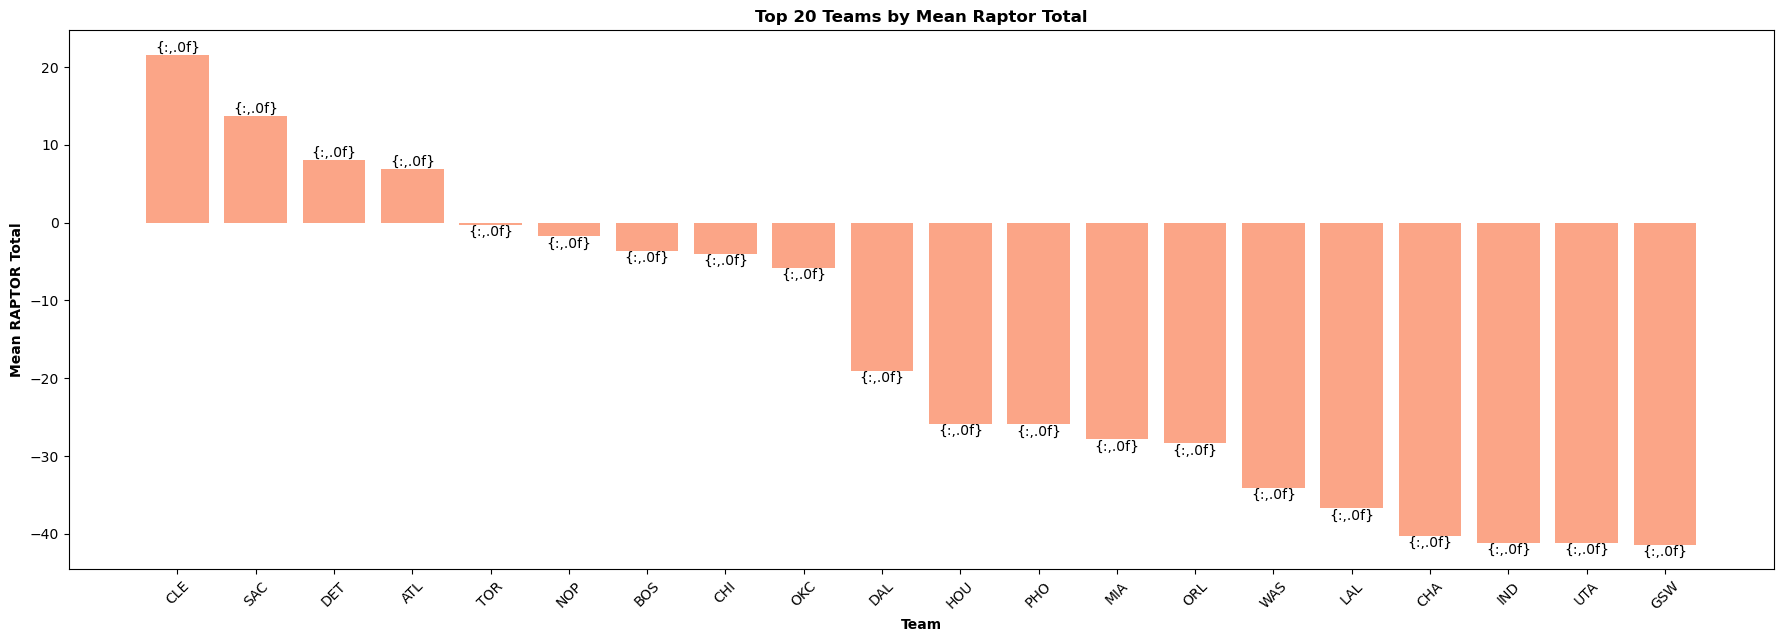

In [32]:
#plt.figure(figsize=(10, 6))
#top_20_rteams.plot(kind= "bar")
#plt.title("Top 20 Teams by Mean Raptor Total")
#plt.xlabel("Team")
#plt.ylabel("Mean Raptor Total")
#plt.xticks(rotation= 90)
#plt.tight_layout()

top_raptor_teams = raptor_predator_df[["team", "Raptor Total"]].\
sort_values(by="Raptor Total", ascending=False).head(20)

# Set up variables
raptor = top_raptor_teams["Raptor Total"]
team_names = top_raptor_teams["team"]

# Generate Bar plot
bar_plot(team_names, raptor, "Team", "Mean RAPTOR Total", "Teams by Mean Raptor Total", (22,7))

<Figure size 1000x600 with 0 Axes>

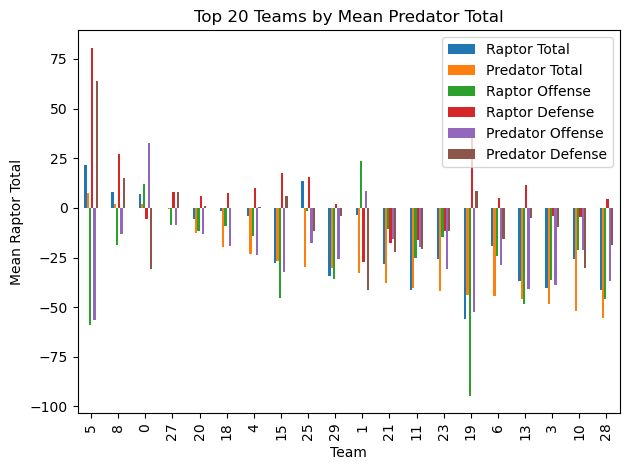

In [33]:
plt.figure(figsize=(10, 6))
top_20_pteams.plot(kind= "bar")
plt.title("Top 20 Teams by Mean Predator Total")
plt.xlabel("Team")
plt.ylabel("Mean Raptor Total")
plt.xticks(rotation= 90)
plt.tight_layout()

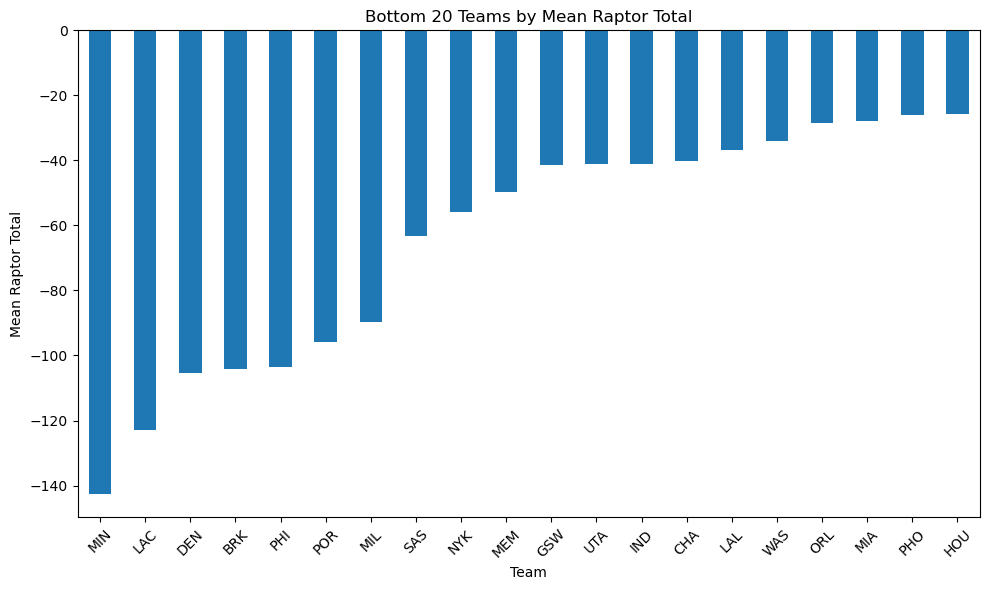

In [34]:
plt.figure(figsize=(10, 6))
bottom_20_teams.plot(kind= "bar")
plt.title("Bottom 20 Teams by Mean Raptor Total")
plt.xlabel("Team")
plt.ylabel("Mean Raptor Total")
plt.xticks(rotation=45)
plt.tight_layout()

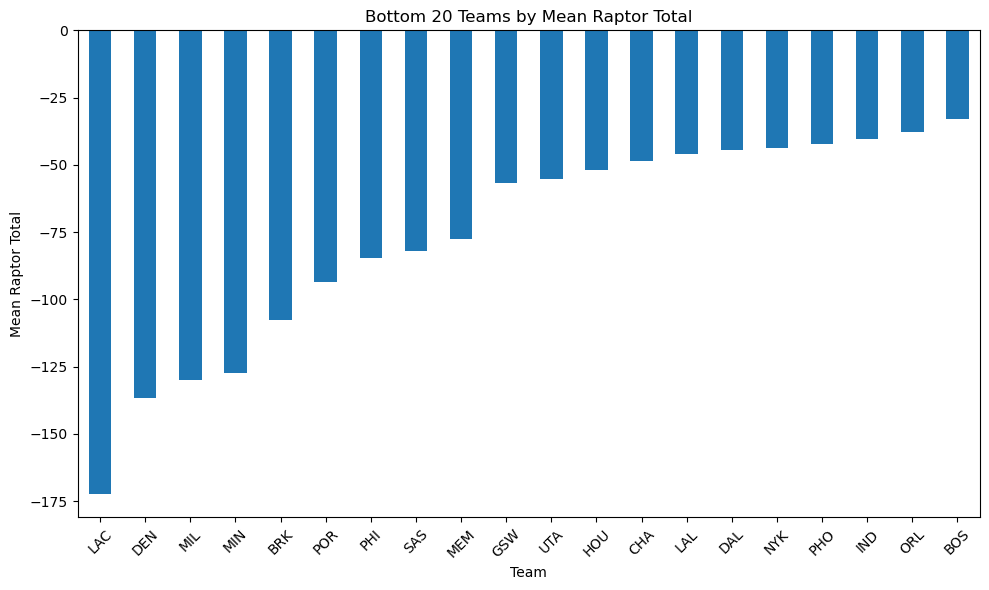

In [35]:
plt.figure(figsize=(10, 6))
bottom_20_pteams.plot(kind= "bar")
plt.title("Bottom 20 Teams by Mean Raptor Total")
plt.xlabel("Team")
plt.ylabel("Mean Raptor Total")
plt.xticks(rotation=45)
plt.tight_layout()

### Question #3: How accurate are the overall results of predictive-RAPTOR, which was used for the historical data charts (1977-2013), compared to those of modern RAPTOR’s integration (2013-Present)?

**Calculating historical and latest RAPTOR totals by team**

In [36]:
his_team_raptor_totals = historical_df.groupby("team")["raptor_total"].sum().reset_index()
his_team_raptor_totals.head()

team  raptor_total
0  ATL  -1867.349832
1  BOS  -1461.653071
2  BRK   -300.833420
3  BUF   -100.487762
4  CHA   -858.869307

In [37]:
lat_team_raptor_totals = latest_df.groupby("team")["raptor_total"].sum().reset_index()
lat_team_raptor_totals.head()

team  raptor_total
0  ATL      6.863266
1  BOS     -3.631239
2  BRK   -104.256530
3  CHA    -40.304983
4  CHI     -4.001443

In [38]:
merged_team_raptor_totals = lat_team_raptor_totals.merge(his_team_raptor_totals, on="team", suffixes=("_latest", "_historical"))
merged_team_raptor_totals.head()

team  raptor_total_latest  raptor_total_historical
0  ATL             6.863266             -1867.349832
1  BOS            -3.631239             -1461.653071
2  BRK          -104.256530              -300.833420
3  CHA           -40.304983              -858.869307
4  CHI            -4.001443             -1531.152283

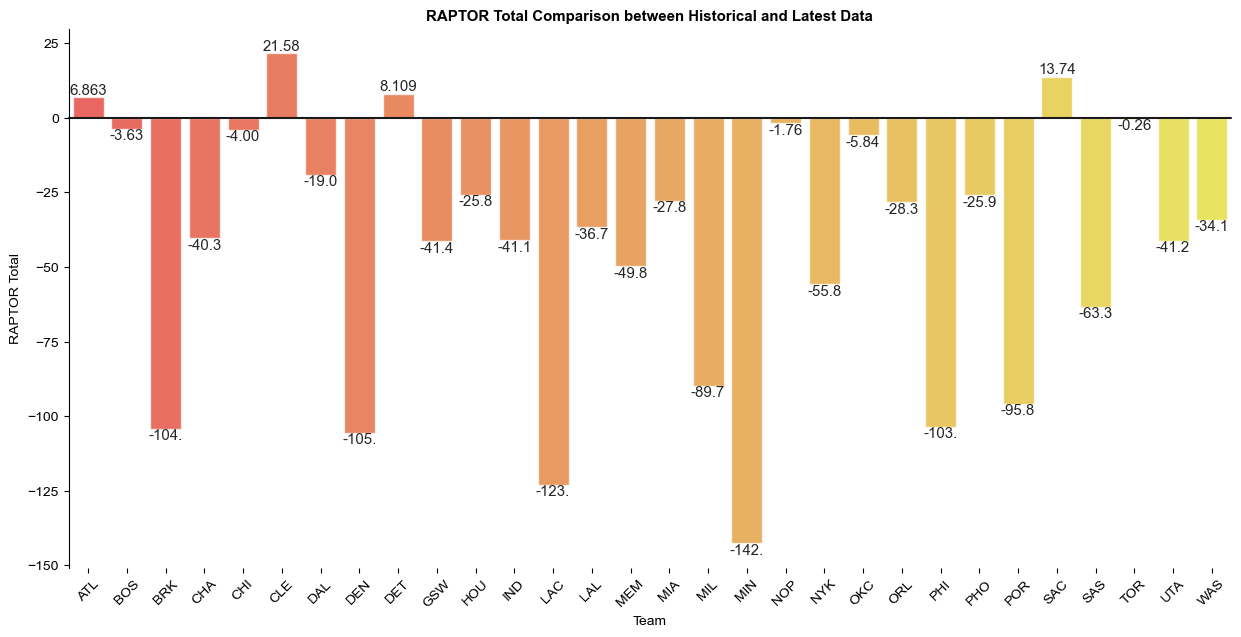

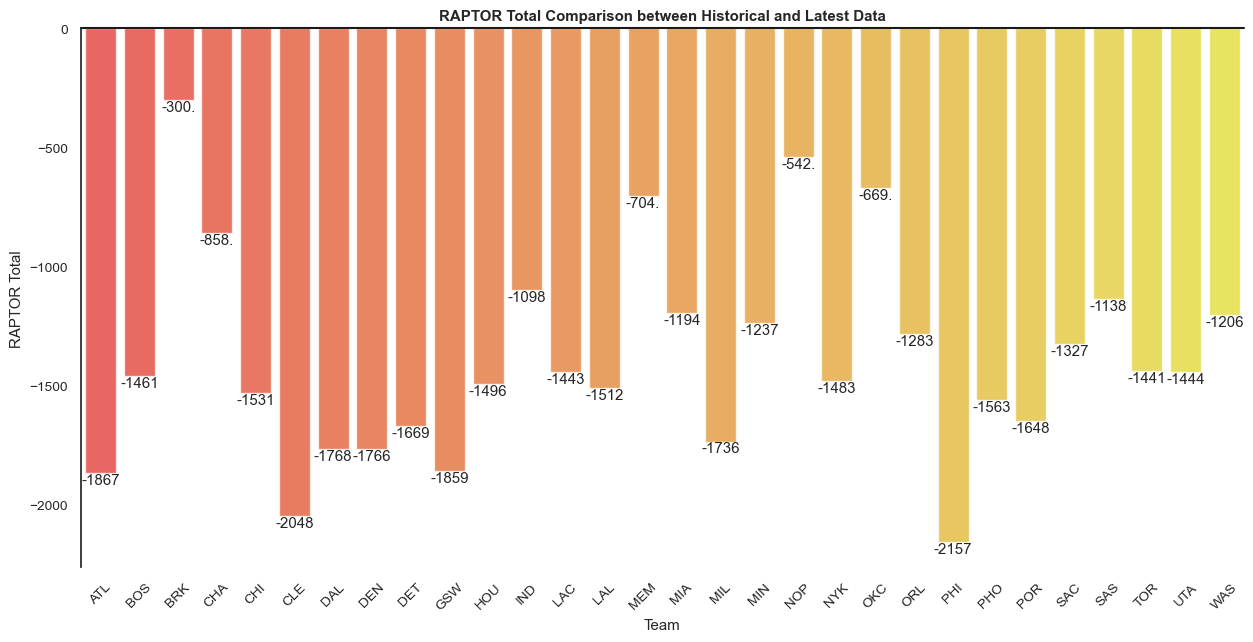

In [39]:
sns_raptor_latest = sns_bar_plot(merged_team_raptor_totals, "team", "raptor_total_latest", "RAPTOR Total Comparison between Historical and Latest Data",
             "Team", "RAPTOR Total")

sns_raptor_his = sns_bar_plot(merged_team_raptor_totals, "team", "raptor_total_historical", "RAPTOR Total Comparison between Historical and Latest Data",
             "Team", "RAPTOR Total")

C:\Users\uzmaf\anaconda3\envs\pyviz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



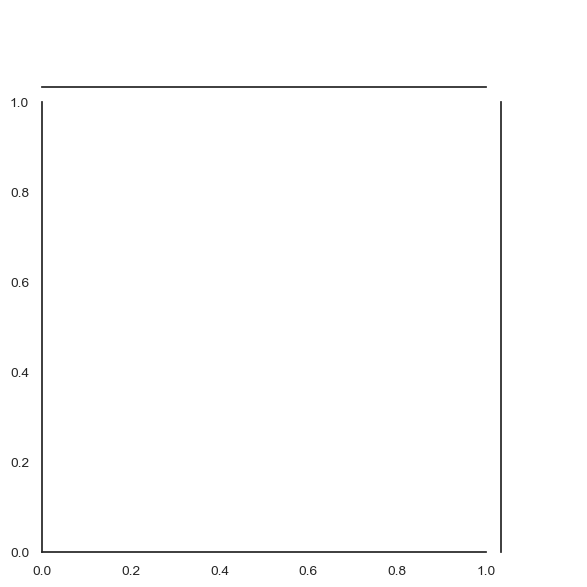

In [40]:
sns.jointplot(sns_raptor_latest, sns_raptor_his)

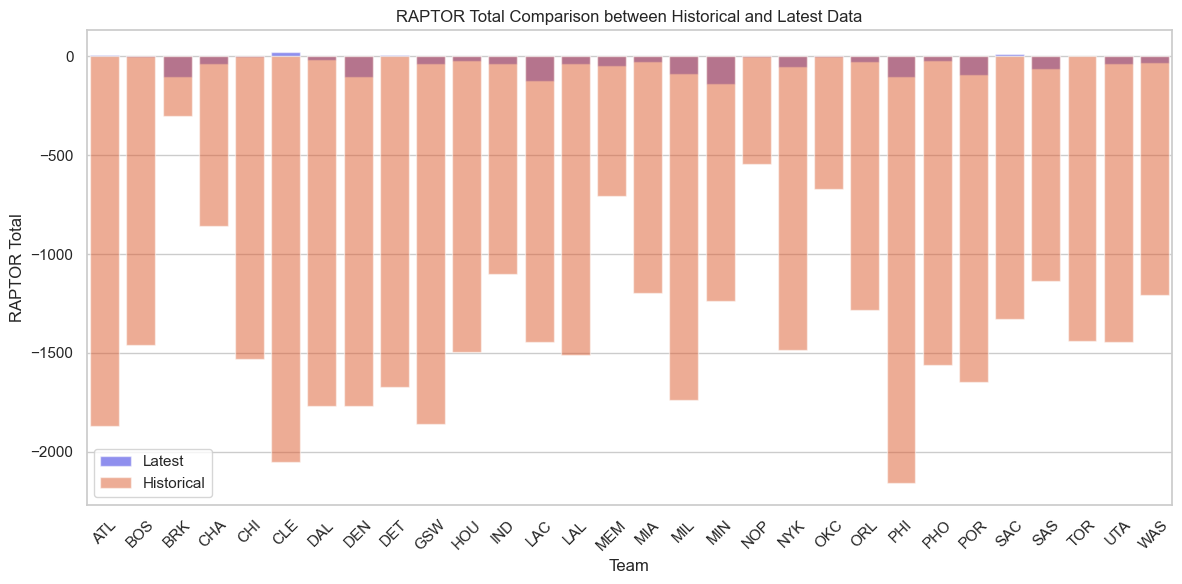

In [41]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_team_raptor_totals, x="team", y="raptor_total_latest", alpha = 0.5, color="blue", label="Latest")
sns.barplot(data=merged_team_raptor_totals, x="team", y="raptor_total_historical", alpha = 0.5, color="#F94C10", label="Historical")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("RAPTOR Total")
plt.title("RAPTOR Total Comparison between Historical and Latest Data")
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



**Calculating Historical and Latest War total**

In [42]:
his_team_war_totals = historical_df.groupby("team")["war_total"].sum().reset_index()
his_team_war_totals.head()

team    war_total
0  ATL  1319.084509
1  BOS  1712.529584
2  BRK   255.392848
3  BUF    36.396243
4  CHA   349.159085

In [43]:
lat_team_war_totals = latest_df.groupby("team")["war_total"].sum().reset_index()
lat_team_war_totals.head()

team  war_total
0  ATL  31.989519
1  BOS  57.010582
2  BRK  31.362127
3  CHA  12.818726
4  CHI  31.283879

In [44]:
merged_war_totals = his_team_war_totals.merge(lat_team_war_totals, on="team", suffixes=("_historical", "_latest"))
merged_war_totals.head()

team  war_total_historical  war_total_latest
0  ATL           1319.084509         31.989519
1  BOS           1712.529584         57.010582
2  BRK            255.392848         31.362127
3  CHA            349.159085         12.818726
4  CHI           1447.384776         31.283879

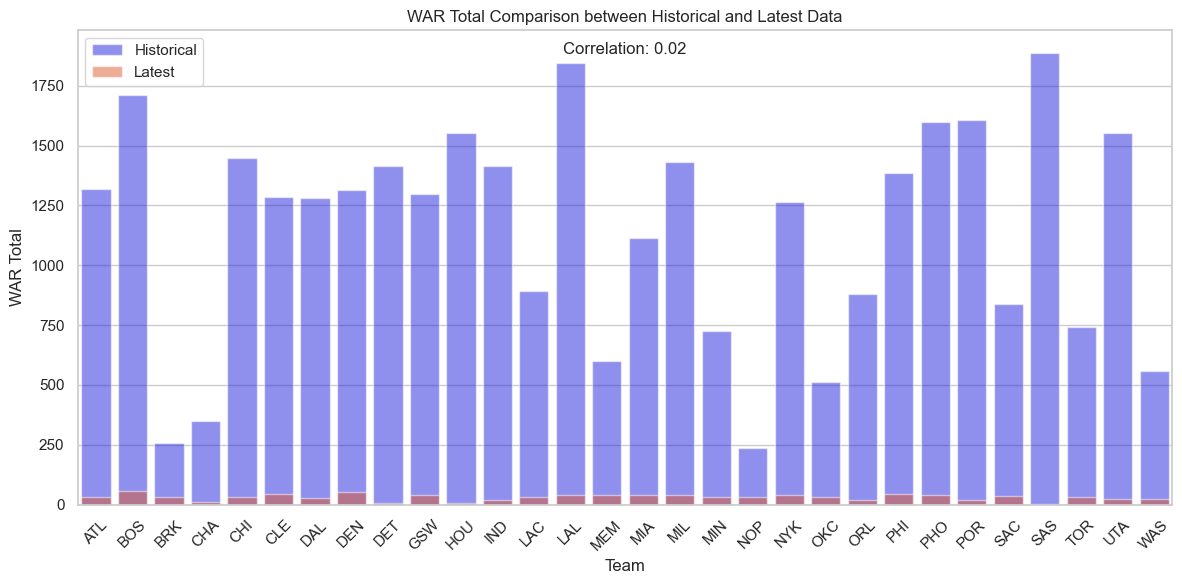

In [45]:
# Calculate the correlation coefficient
correlation = merged_war_totals["war_total_historical"].corr(merged_war_totals["war_total_latest"])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="team", y="war_total_historical", data=merged_war_totals, alpha = 0.5, color="blue", label="Historical")
sns.barplot(x="team", y="war_total_latest", data=merged_war_totals, alpha = 0.5, color="#F94C10", label="Latest")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("WAR Total")
plt.title("WAR Total Comparison between Historical and Latest Data")
plt.xticks(rotation=45)
plt.legend()

# Add the correlation coefficient as text on the plot
plt.text(0.5, 0.95, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, ha="center")

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
#Finding the average/mean of the RAPTOR total

In [47]:
average_his_team_raptor_total = historical_df.groupby("team")["raptor_total"].mean().reset_index()
average_his_team_raptor_total.head()

team  raptor_total
0  ATL     -1.616753
1  BOS     -1.228280
2  BRK     -0.999447
3  BUF     -2.715885
4  CHA     -2.379139

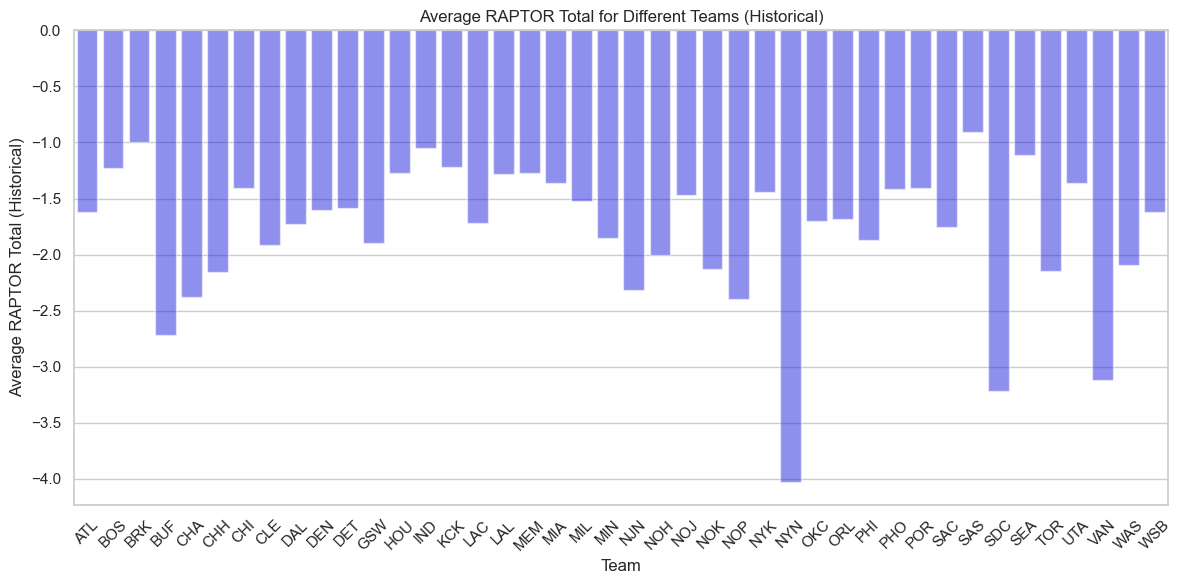

In [48]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="team", y="raptor_total", data=average_his_team_raptor_total, alpha = 0.5, color="blue")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("Average RAPTOR Total (Historical)")
plt.title("Average RAPTOR Total for Different Teams (Historical)")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
average_lat_team_raptor_total = latest_df.groupby("team")["raptor_total"].mean().reset_index()
average_lat_team_raptor_total.head()

team  raptor_total
0  ATL      0.228776
1  BOS     -0.113476
2  BRK     -2.673244
3  CHA     -2.121315
4  CHI     -0.222302

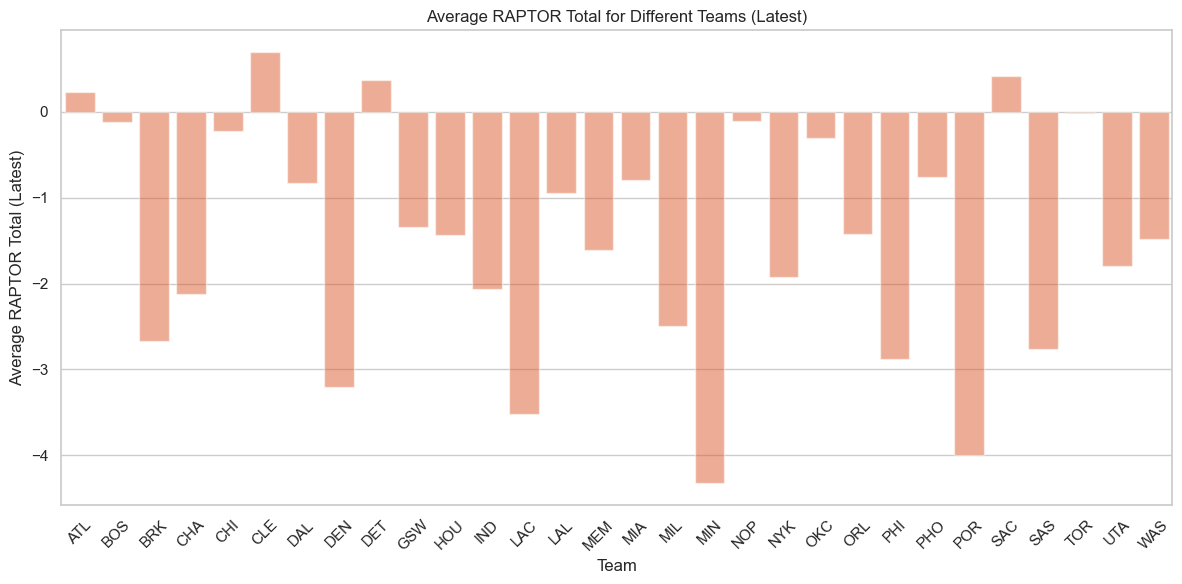

In [50]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="team", y="raptor_total", data=average_lat_team_raptor_total, alpha = 0.5, color="#F94C10")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("Average RAPTOR Total (Latest)")
plt.title("Average RAPTOR Total for Different Teams (Latest)")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [51]:
merged_raptor_totals = pd.merge(average_lat_team_raptor_total, average_his_team_raptor_total, on="team", suffixes=("_latest", "_historical"))
merged_raptor_totals.head()

team  raptor_total_latest  raptor_total_historical
0  ATL             0.228776                -1.616753
1  BOS            -0.113476                -1.228280
2  BRK            -2.673244                -0.999447
3  CHA            -2.121315                -2.379139
4  CHI            -0.222302                -1.402154

In [52]:
#Historical VS Latest average RAPTOR total (bar graph)

C:\Users\uzmaf\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\uzmaf\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



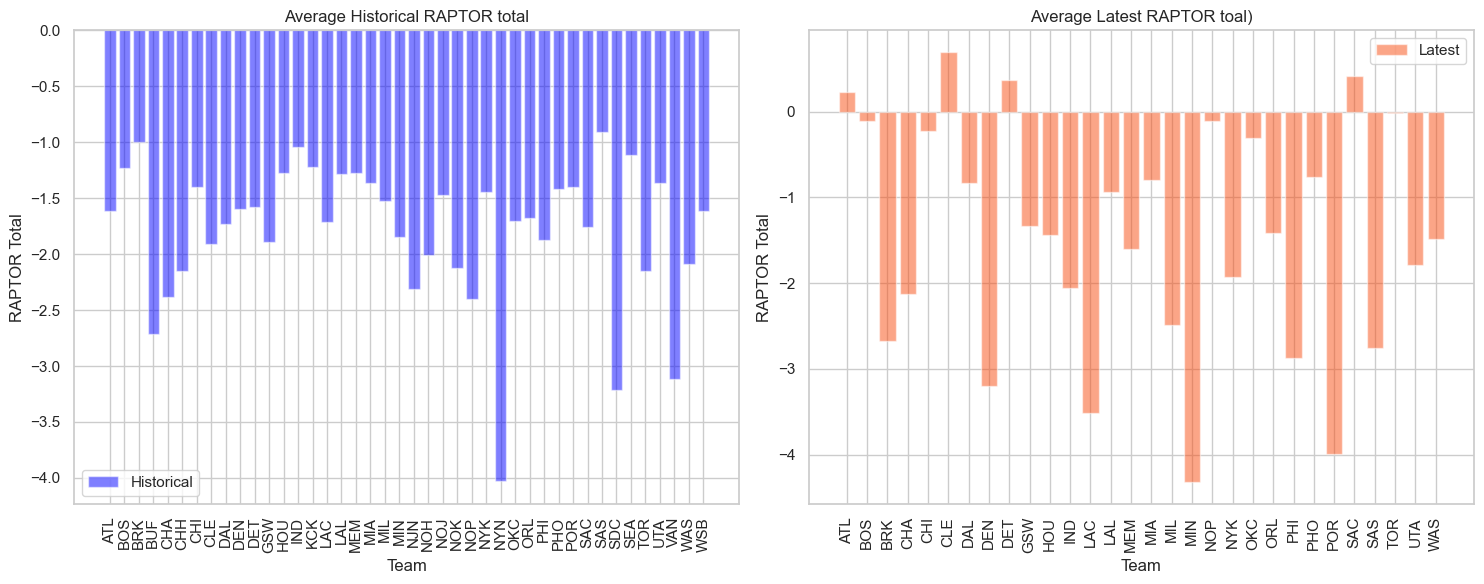

In [53]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot historical team RAPTOR means
axes[0].bar(average_his_team_raptor_total["team"], average_his_team_raptor_total["raptor_total"], alpha = 0.5, color = "blue", label="Historical")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("RAPTOR Total")
axes[0].set_title("Average Historical RAPTOR total")
axes[0].set_xticklabels(average_his_team_raptor_total["team"], rotation=90)
axes[0].legend()

# Plot latest team RAPTOR means
axes[1].bar(average_lat_team_raptor_total["team"], average_lat_team_raptor_total["raptor_total"], alpha = 0.5, color="#F94C10", label="Latest")
axes[1].set_xlabel("Team")
axes[1].set_ylabel("RAPTOR Total")
axes[1].set_title("Average Latest RAPTOR toal)")
axes[1].set_xticklabels(average_lat_team_raptor_total["team"], rotation=90)
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

In [54]:
#Historical VS Latest average RAPTOR total scatterplot

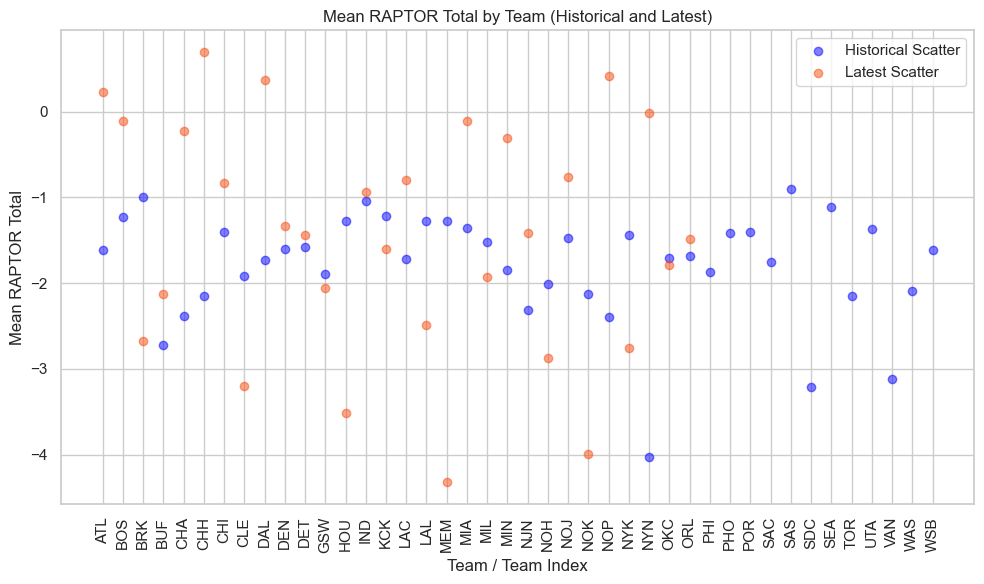

In [55]:
# Create a scatter plot with both historical and latest data
plt.figure(figsize=(10, 6))

# Scatter plot for historical team RAPTOR means
plt.scatter(average_his_team_raptor_total["team"], average_his_team_raptor_total["raptor_total"], alpha = 0.5,color="blue", label="Historical Scatter")

# Scatter plot for latest team RAPTOR means
plt.scatter(average_lat_team_raptor_total.index, average_lat_team_raptor_total["raptor_total"], alpha = 0.5, color="#F94C10", label="Latest Scatter")

plt.xlabel("Team / Team Index")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Historical and Latest)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

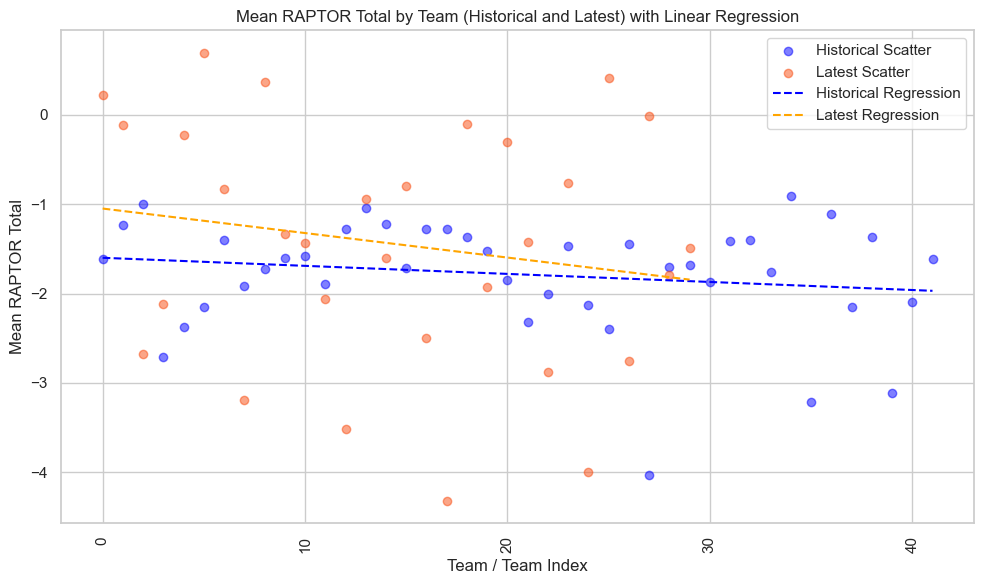

In [56]:
# Create a scatter plot with both historical and latest data
plt.figure(figsize=(10, 6))

# Scatter plot for historical team RAPTOR means
plt.scatter(average_his_team_raptor_total.index, average_his_team_raptor_total["raptor_total"], alpha = 0.5, color="blue", label="Historical Scatter")

# Scatter plot for latest team RAPTOR means
plt.scatter(average_lat_team_raptor_total.index, average_lat_team_raptor_total["raptor_total"], alpha = 0.5, color="#F94C10", label="Latest Scatter")

# Linear regression for historical data
hist_x = average_his_team_raptor_total.index.values
hist_y = average_his_team_raptor_total["raptor_total"].values
hist_slope, hist_intercept = np.polyfit(hist_x, hist_y, 1)
plt.plot(hist_x, hist_slope * hist_x + hist_intercept, color="blue", linestyle="--", label="Historical Regression")

# Linear regression for latest data
lat_x = average_lat_team_raptor_total.index.values
lat_y = average_lat_team_raptor_total["raptor_total"].values
lat_slope, lat_intercept = np.polyfit(lat_x, lat_y, 1)
plt.plot(lat_x, lat_slope * lat_x + lat_intercept, color="orange", linestyle="--", label="Latest Regression")

plt.xlabel("Team / Team Index")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Historical and Latest) with Linear Regression")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
#Finding the average/mean of the RAPTOR war total

In [58]:
average_his_team_war_totals = historical_df.groupby("team")["war_total"].mean().reset_index()
average_his_team_war_totals.head()

team  war_total
0  ATL   1.142065
1  BOS   1.439100
2  BRK   0.848481
3  BUF   0.983682
4  CHA   0.967200

In [59]:
average_lat_team_war_totals = latest_df.groupby("team")["war_total"].mean().reset_index()
average_lat_team_war_totals.head()

team  war_total
0  ATL   1.066317
1  BOS   1.781581
2  BRK   0.804157
3  CHA   0.674670
4  CHI   1.737993

In [60]:
#Historical VS Latest War totals

C:\Users\uzmaf\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\uzmaf\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



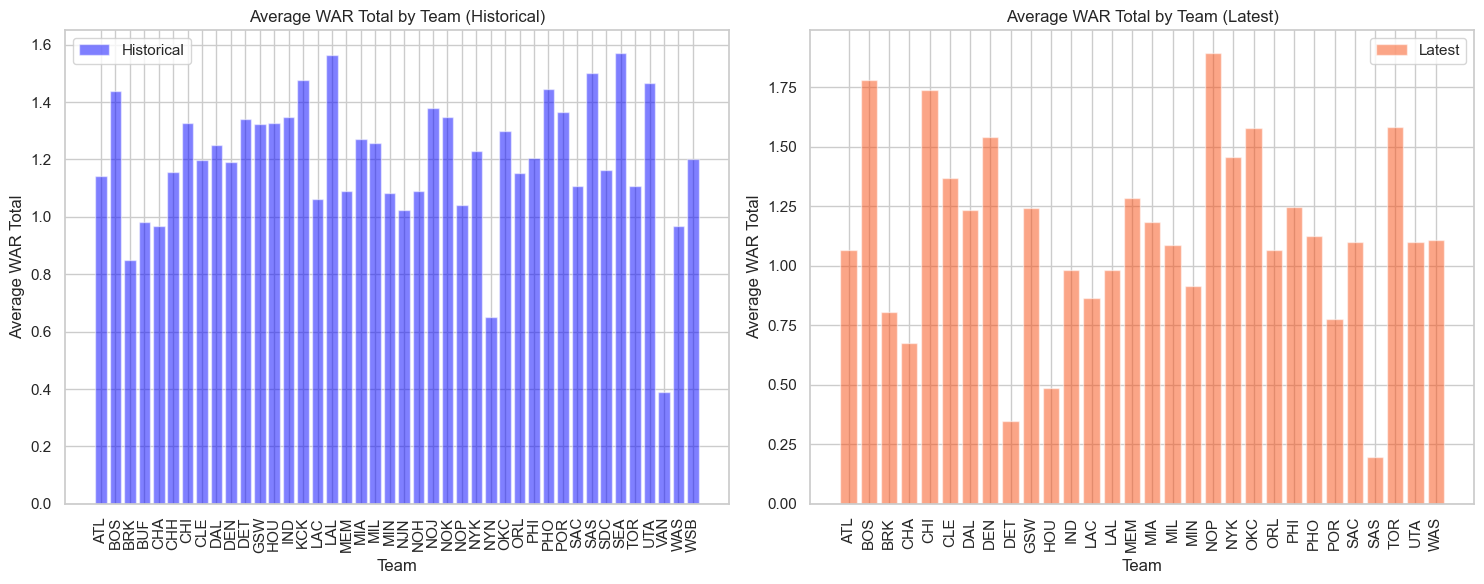

In [61]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot average historical team WAR totals (bar plot)
axes[0].bar(average_his_team_war_totals["team"], average_his_team_war_totals["war_total"], alpha = 0.5, color = "blue", label="Historical")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Average WAR Total")
axes[0].set_title("Average WAR Total by Team (Historical)")
axes[0].set_xticklabels(average_his_team_war_totals["team"], rotation=90)
axes[0].legend()

# Plot average latest team WAR totals (bar plot)
axes[1].bar(average_lat_team_war_totals["team"], average_lat_team_war_totals["war_total"], alpha =0.5, color="#F94C10", label="Latest")
axes[1].set_xlabel("Team")
axes[1].set_ylabel("Average WAR Total")
axes[1].set_title("Average WAR Total by Team (Latest)")
axes[1].set_xticklabels(average_lat_team_war_totals["team"], rotation=90)
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

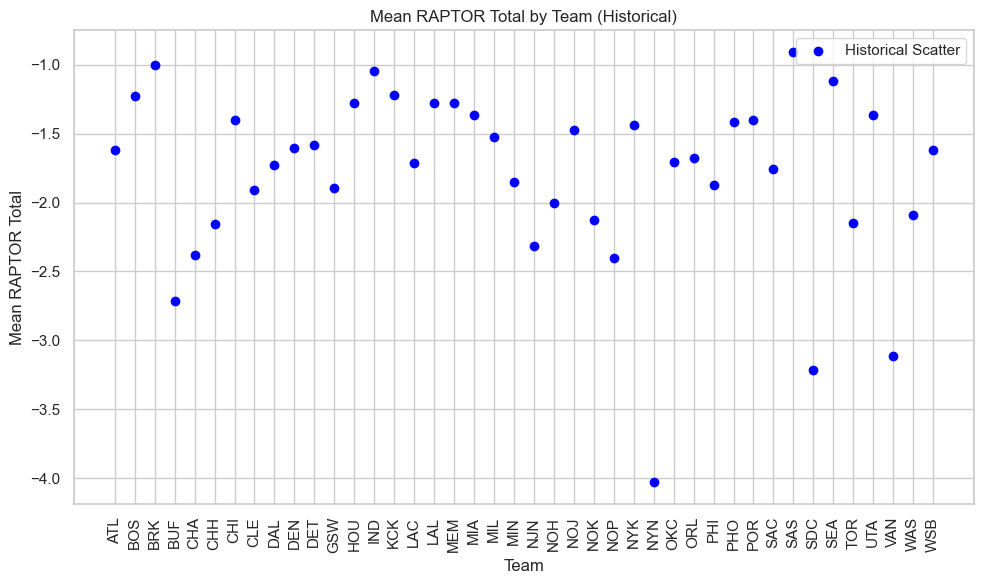

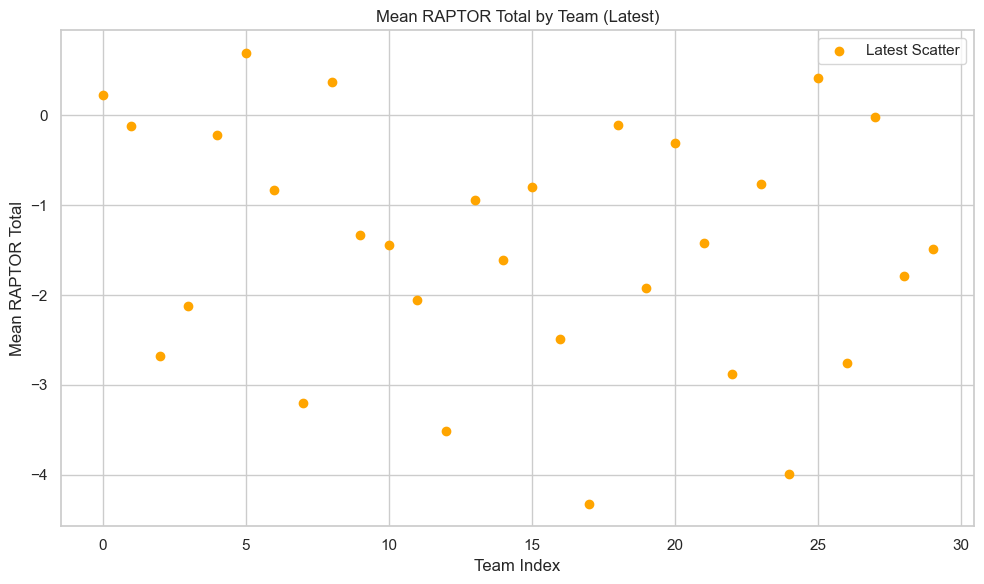

In [62]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_his_team_raptor_total["team"], average_his_team_raptor_total["raptor_total"], color="blue", label="Historical Scatter")
plt.xlabel("Team")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Historical)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
# Create a scatter plot for latest team RAPTOR means
plt.figure(figsize=(10, 6))
plt.scatter(average_lat_team_raptor_total.index, average_lat_team_raptor_total["raptor_total"], color="orange", label="Latest Scatter")
plt.xlabel("Team Index")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Latest)")
plt.legend()
plt.tight_layout()
plt.show()

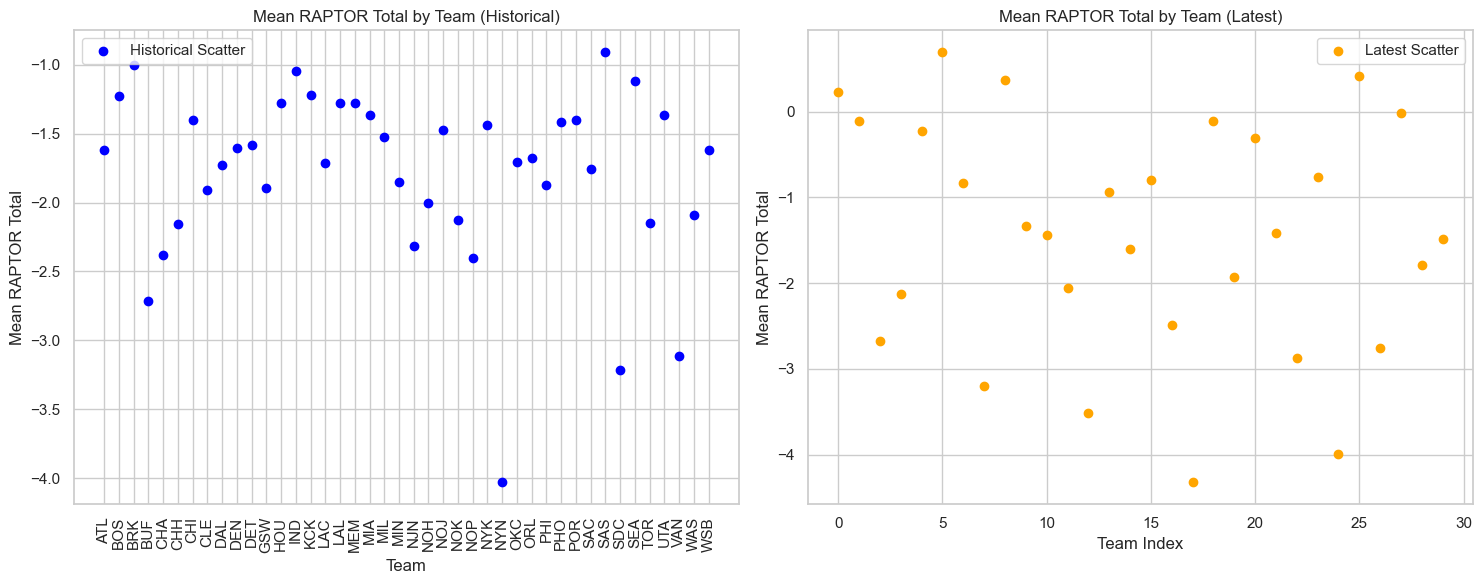

In [63]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for historical team RAPTOR means
axes[0].scatter(average_his_team_raptor_total["team"], average_his_team_raptor_total["raptor_total"], color="blue", label="Historical Scatter")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Mean RAPTOR Total")
axes[0].set_title("Mean RAPTOR Total by Team (Historical)")
axes[0].tick_params(axis="x", rotation=90)
axes[0].legend()

# Scatter plot for latest team RAPTOR means
axes[1].scatter(average_lat_team_raptor_total.index, average_lat_team_raptor_total["raptor_total"], color="orange", label="Latest Scatter")
axes[1].set_xlabel("Team Index")
axes[1].set_ylabel("Mean RAPTOR Total")
axes[1].set_title("Mean RAPTOR Total by Team (Latest)")
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

### Question #4: Which players had the most minutes played and the greatest pace impact on their team compared to their total RAPTOR scores?

In [64]:
# Data wrangling
# Filter columns

df=clean_df[["player_name","mp","raptor_total","pace_impact"]]


# Get the totals of minutes played,pace impact and raptor totals of each player.

total_mp=df.groupby("player_name")["mp"].sum()
total_pace_impact=df.groupby("player_name")["pace_impact"].sum()
total_raptor=df.groupby("player_name")["raptor_total"].sum()

# Make it into a Dataframe

total_mp_pace_raptor = pd.DataFrame({"Total_Minutes_Played": total_mp,
                             "Total_Pace_Impact": total_pace_impact,
                             "Total_RAPTOR_Scores": total_raptor})
total_mp_pace_raptor=total_mp_pace_raptor.reset_index()

# Display the Dataframe

total_mp_pace_raptor.head(2)

player_name  Total_Minutes_Played  Total_Pace_Impact  Total_RAPTOR_Scores
0     A.C. Green                 40671         -14.631130            -5.311204
1  A.J. Bramlett                    61           0.527413            -9.820485

**Top 20 Minutes Played & Pace Impact per Player**

In [65]:
# Sort data

pace=total_mp_pace_raptor.sort_values(by="Total_RAPTOR_Scores",ascending=False)
pace_20=pace.head(20)

tmp=total_mp_pace_raptor.sort_values(by="Total_Minutes_Played",ascending=False)
mp_20=tmp.head(20)

# Generate polar bar

polar_bar(pace_20,"Total_Pace_Impact","Top 20 Total Pace Impact per Player")
polar_bar(mp_20,"Total_Minutes_Played","Top 20 Minutes Played per Player")



**RAPTOR Scores and in relation with Minutes played and Total Pace Impact**

In [66]:
# Sort the data

multi=total_mp_pace_raptor.sort_values(by="Total_RAPTOR_Scores",ascending=False)
multi

# declare variables

x=multi["Total_RAPTOR_Scores"]
y=multi["Total_Minutes_Played"]

# generate scatter plot

int_scatter(multi,x,y,"Total_Pace_Impact",
            "RAPTOR Scores and in relation with Minutes played and Total Pace Impact",
           "Total Minutes Played")



### Question #5: How do these statistics line up by player in relation to the top players/teams (MVPs) of the 2022-2023 season?

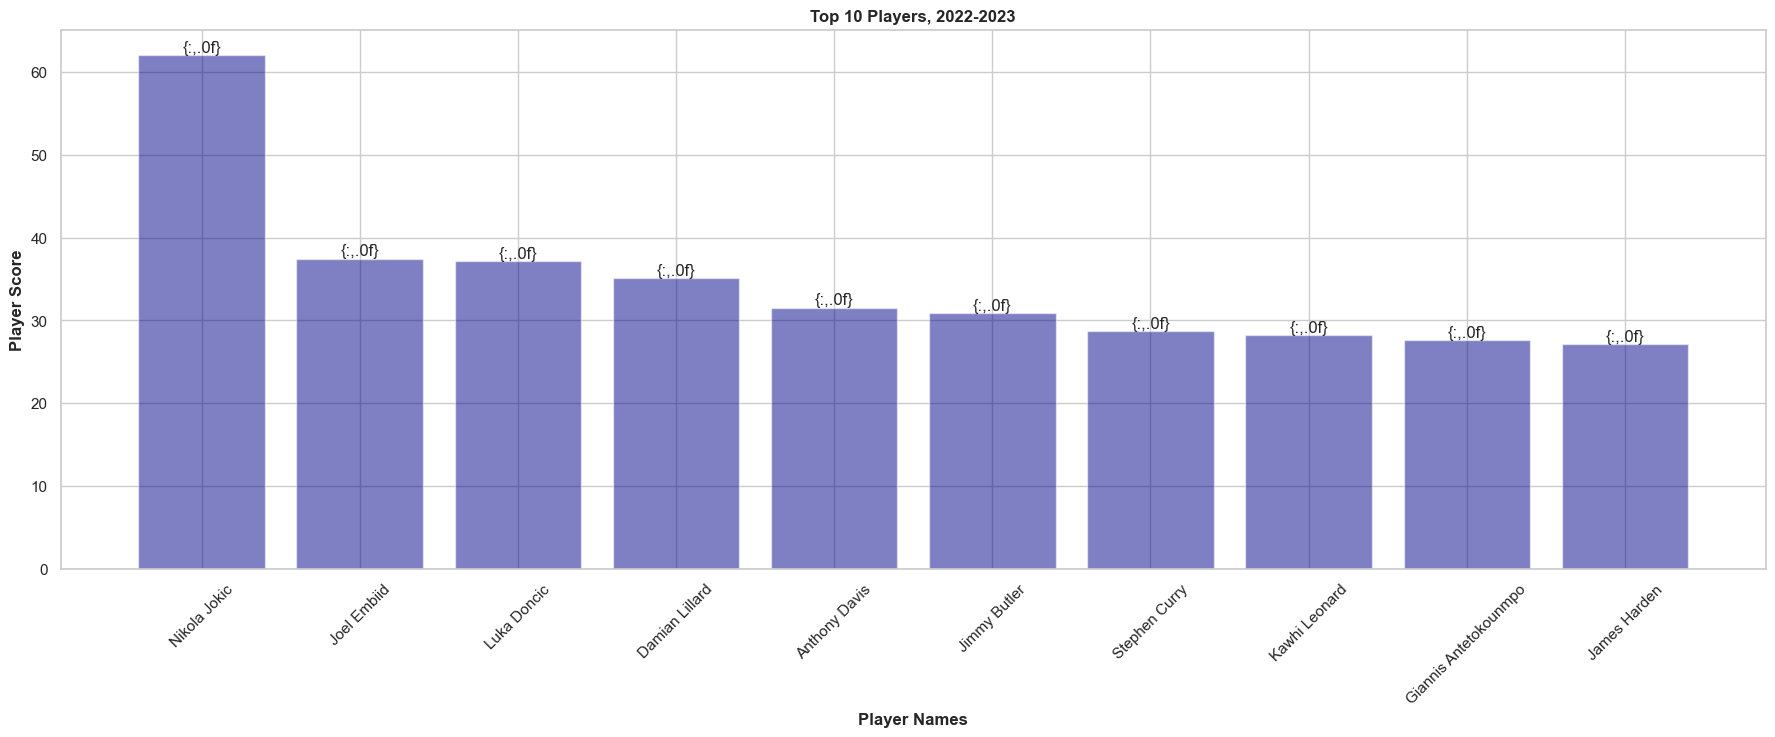

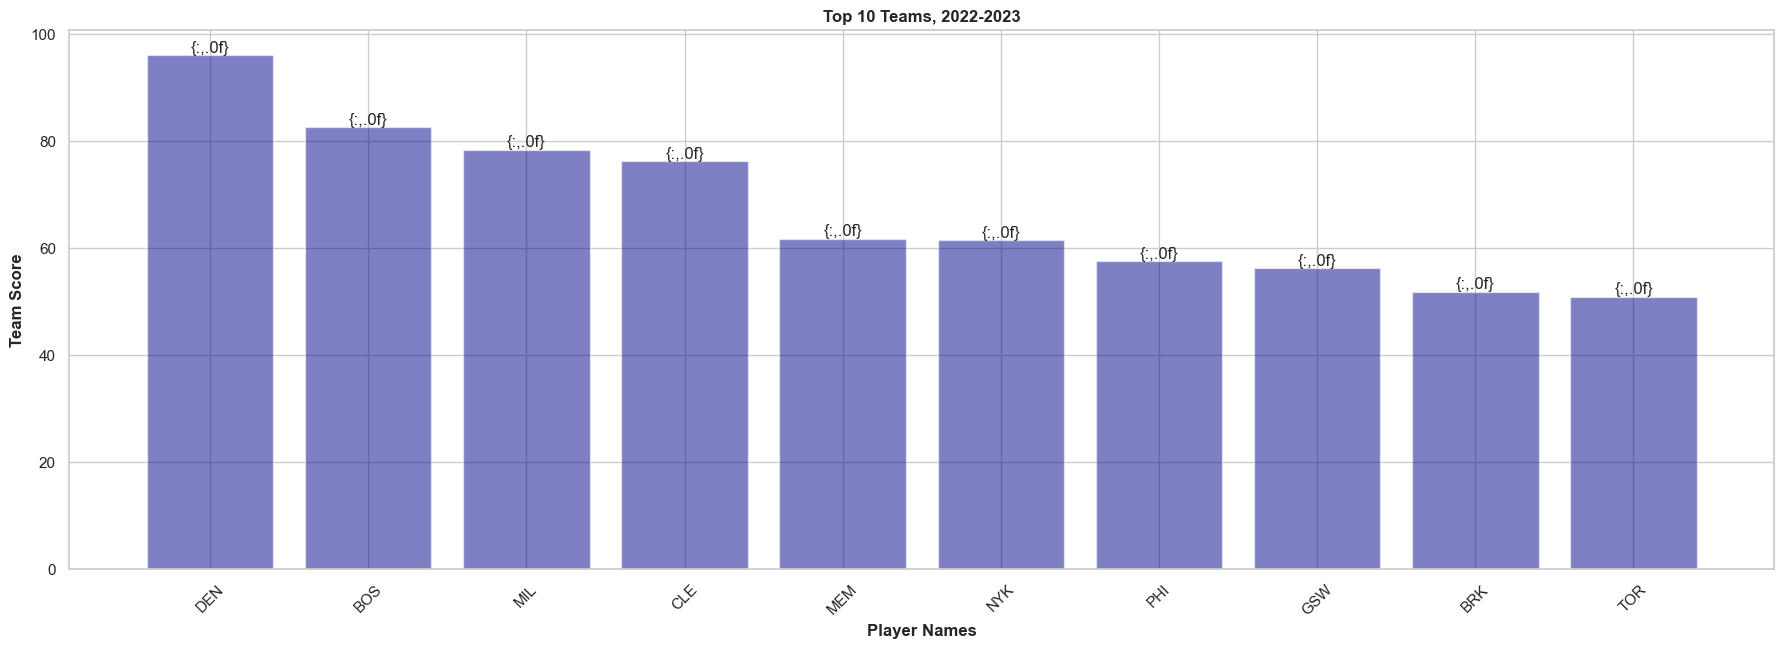

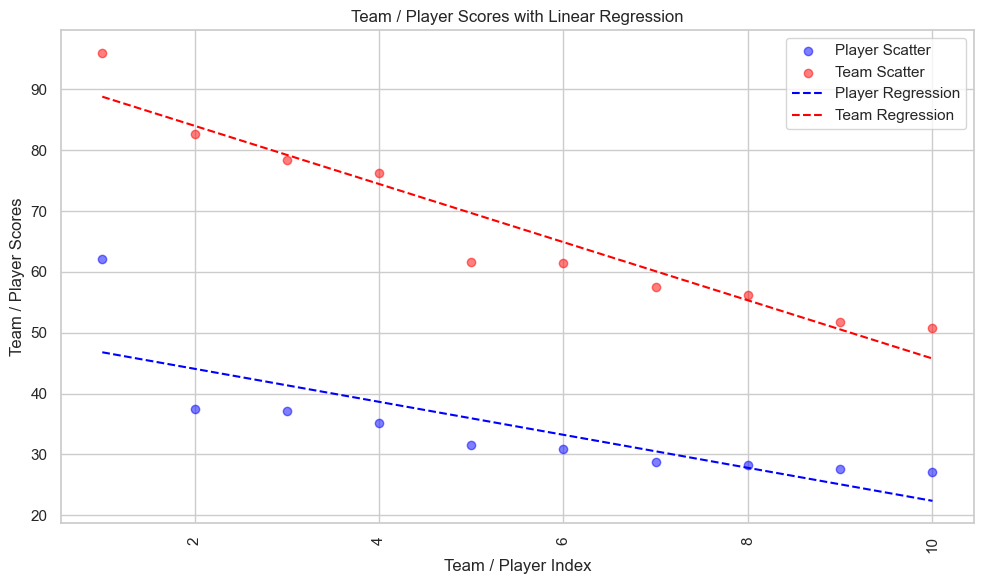

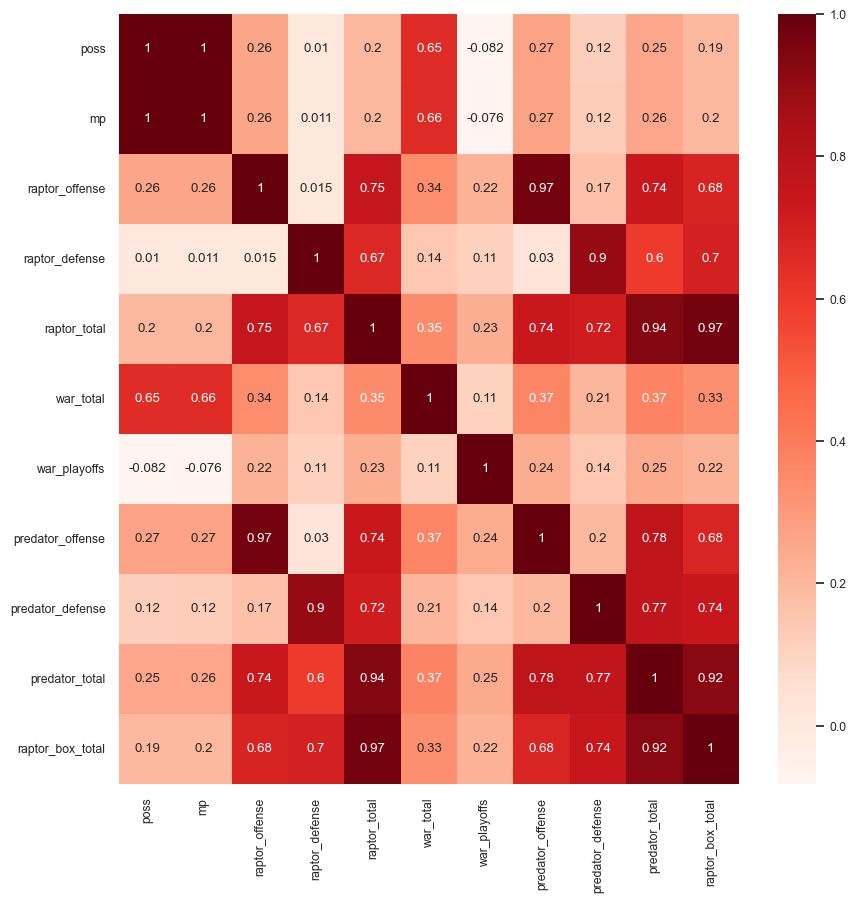

In [67]:
# read csv file
stats_2023 = latest_df
# pd.read_csv("latest_RAPTOR_by_team.csv")

stats_2023.head()

# fill all null values with 0 
clean_df_2023 = stats_2023.fillna(0)

clean_df_2023

clean_df_2023.describe()

# Linear regression

def regression_plot(x_axis, y_axis, xlabel, ylabel, text_coordinates, x=0, y=0):
    

    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_axis, y_axis, marker=r'8', c="#F94C10", s=50, alpha=0.7, edgecolor="#F94C10")
    plt.plot(x_axis, regress_values, "r:", alpha=0.5)
    plt.xlabel(xlabel, weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"{xlabel} vs {ylabel} by Teams", color="#F94C10", weight="bold")
    plt.grid(True, color="b", alpha=0.10)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="#F94C10")
    plt.annotate(line_eq, xy=(x, y), xycoords='axes fraction', fontsize=10, color="red")
    print(f"The r-value is: {rvalue**2}")
    for team, txt in enumerate(team_names):
        plt.annotate(txt, (x_axis[team], y_axis[team]), color="#F94C10",alpha=0.5)
        
    plt.show()

    # bar plot

def bar_plot(x_axis, y_axis, ylabel, title, size,):
    fig, ax = plt.subplots(figsize=(size))
    bar_container= ax.bar(x_axis, y_axis, alpha=0.5, color="darkblue")
    ax.bar_label(bar_container, fmt='{:,.0f}')
    plt.xlabel("Player Names", weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"Top 10 {title}", weight="bold")
    plt.xticks(rotation=45)

    plt.show()

## Top / MVP Players    

# Filter players based on the given conditions
player_filter = clean_df_2023[(clean_df_2023['poss'] > 2000) & (clean_df_2023['mp'] > 1350)]

# Group by player_name and aggregate the statistics
grouped_players = (player_filter.groupby('player_name')
                   .agg({
                       'raptor_total': 'sum',
                       'raptor_box_total': 'sum',
                       'raptor_offense': 'sum',
                       'raptor_defense': 'sum',
                       'war_total': 'sum'
                   }))

# Compute the player score
grouped_players['player_score'] = (grouped_players['raptor_total'] + 
                                   grouped_players['raptor_box_total'] + 
                                   grouped_players['raptor_offense'] + 
                                   grouped_players['raptor_defense'] + 
                                   grouped_players['war_total'])

# Sort players based on the player score and reset the index
sorted_players = (grouped_players.sort_values(by='player_score', ascending=False)
                          .reset_index())

# Adjusting the index to start from 1
sorted_players.index += 1

# Display top 10 players based on the player score
top_players = sorted_players[['player_name', 'player_score']].head(10)
top_players

## Top players - Bar plot 
player_score = top_players["player_score"]
player_names = top_players["player_name"]

bar_plot(player_names, player_score, "Player Score", "Players, 2022-2023", (22,7))

## Player Raptor total 

# Sort players based on "raptor_total" and reset the index
player_raptor_total = (player_filter.sort_values(by='raptor_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
player_raptor_total.index += 1

# Display top 10 players based on "raptor_total"
top_player_raptor_total = player_raptor_total[['player_name', 'raptor_total']].head(10)
top_player_raptor_total

## Player Raptor box total 
# Sort players based on "raptor_box_total" and reset the index
raptor_box_total = (player_filter.sort_values(by='raptor_box_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
raptor_box_total.index += 1

# Display top 10 players based on "raptor_box_total"
top_raptor_box_players = raptor_box_total[['player_name', 'raptor_box_total']].head(10)
top_raptor_box_players

## Player Raptor offense 

# Sort players based on "raptor_offense" and reset the index
raptor_offense = (player_filter.sort_values(by='raptor_offense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
raptor_offense.index += 1

# Display top 10 players based on "raptor_offense"
top_raptor_offense_players = raptor_offense[['player_name', 'raptor_offense']].head(10)
top_raptor_offense_players

## Player Raptor defense 

# Sort players based on "raptor_defense" and reset the index
raptor_defense = (player_filter.sort_values(by='raptor_defense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
raptor_defense.index += 1

# Display top 10 players based on "raptor_defense"
top_raptor_defense_players = raptor_defense[['player_name', 'raptor_defense']].head(10)
top_raptor_defense_players

## Player War total 

# Sort players based on "war_total" and reset the index
war_total = (player_filter.sort_values(by='war_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
war_total.index += 1

# Display top 10 players based on "war_total"
top_war_total_players = war_total[['player_name', 'war_total']].head(10)
top_war_total_players

## Top teams
# Filter teams based on the given conditions
team_filter = clean_df_2023[(clean_df_2023['poss'] > 1500) & (clean_df_2023['mp'] > 1250)]

# Group by team and aggregate the statistics
grouped_teams = (team_filter.groupby('team')
                   .agg({
                       'raptor_total': 'sum',
                       'raptor_box_total': 'sum',
                       'raptor_offense': 'sum',
                       'raptor_defense': 'sum',
                       'war_total': 'sum'
                   }))

# Compute the team score
grouped_teams['team_score'] = (grouped_teams['raptor_total'] + 
                                   grouped_teams['raptor_box_total'] + 
                                   grouped_teams['raptor_offense'] + 
                                   grouped_teams['raptor_defense'] + 
                                   grouped_teams['war_total'])

# Sort teams based on the teams score and reset the index
sorted_teams = (grouped_teams.sort_values(by='team_score', ascending=False)
                          .reset_index())

# Adjusting the index to start from 1
sorted_teams.index += 1

# Display the top 10 teams based on the player score
top_teams = sorted_teams[['team', 'team_score']].head(10)
top_teams

## Top team - Bar plot 

team_score = top_teams["team_score"]
teams = top_teams["team"]

bar_plot(teams, team_score, "Team Score", "Teams, 2022-2023", (22,7))

## Top Teams - Raptor total

# Sort team based on "raptor_total" and reset the index
team_raptor_total = (player_filter.sort_values(by='raptor_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_total.index += 1

# Display the top 10 teams based on "raptor_total"
top_team_raptor_total = team_raptor_total[['team', 'raptor_total']].head(10)
top_team_raptor_total

## Team Raptor box total

# Sort teams based on "raptor_box_total" and reset the index
team_raptor_box_total = (player_filter.sort_values(by='raptor_box_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_box_total.index += 1

# Display top 10 teams based on "raptor_box_total"
top_team_raptor_box_total = team_raptor_box_total[['team', 'raptor_box_total']].head(10)
top_team_raptor_box_total

## Team Raptor offense

# Sort teams based on "raptor_offense" and reset the index
team_raptor_offense = (player_filter.sort_values(by='raptor_offense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_offense.index += 1

# Display top 10 teams based on "raptor_offense"
top_team_raptor_offense = team_raptor_offense[['team', 'raptor_offense']].head(10)
top_team_raptor_offense

## Top Teams - Raptor Defense 

# Sort teams based on "raptor_defense" and reset the index
team_raptor_defense = (player_filter.sort_values(by='raptor_defense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_defense.index += 1

# Display top 10 teams based on "raptor_defense"
top_team_raptor_defense = team_raptor_defense[['team', 'raptor_defense']].head(10)
top_team_raptor_defense

## Top Teams - War Total 
# Sort teams based on "war_total" and reset the index
team_war_total = (player_filter.sort_values(by='war_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_war_total.index += 1

# Display top 10 teams based on "war_total"
top_team_war_total = team_war_total[['team', 'war_total']].head(10)
top_team_war_total

## Linear regression
# Scatter plot with top players & top teams data
plt.figure(figsize=(10, 6))

# Scatter plot for players top scores
plt.scatter(top_players.index, top_players["player_score"], alpha = 0.5, color="blue", label="Player Scatter")

# Scatter plot for teams top scores
plt.scatter(top_teams.index, top_teams["team_score"], alpha = 0.5, color="red", label="Team Scatter")

# Linear regression for top players
hist_x = top_players.index.values
hist_y = top_players["player_score"].values
hist_slope, hist_intercept = np.polyfit(hist_x, hist_y, 1)
plt.plot(hist_x, hist_slope * hist_x + hist_intercept, color="blue", linestyle="--", label="Player Regression")

# Linear regression for top team
lat_x = top_teams.index.values
lat_y = top_teams["team_score"].values
lat_slope, lat_intercept = np.polyfit(lat_x, lat_y, 1)
plt.plot(lat_x, lat_slope * lat_x + lat_intercept, color="red", linestyle="--", label="Team Regression")

plt.xlabel("Team / Player Index")
plt.ylabel("Team / Player Scores")
plt.title("Team / Player Scores with Linear Regression")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## Correlation

corr_df=clean_df_2023[['poss',
       'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total', 
       'war_playoffs', 'predator_offense', 'predator_defense', 'predator_total',
       'raptor_box_total']].corr()


plt.figure(figsize=(10,10))
sns.set_context("notebook",font_scale=0.8)

sns.heatmap(corr_df, annot=True, cmap="Reds")
plt.show()

### Evaluations and Results: What are some key differences between those who had a final RAPTOR score that was either positive versus negative?

## **Analysis**

### Correaltion Matrix

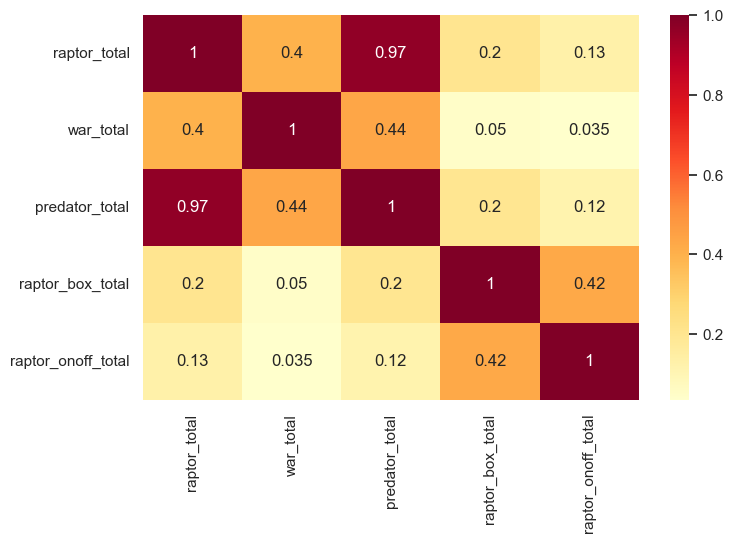

In [68]:
# Filter the clean dataframe for desired features
# Needs more filtering

df_mx=clean_df[[ 'raptor_total', 'war_total','predator_total','raptor_box_total','raptor_onoff_total']].corr()

# plot a heatmap 

plt.figure(figsize=(8,5))
sns.set_context("notebook",font_scale=1)

sns.heatmap(df_mx, annot=True, cmap="YlOrRd")
plt.show()

fig=px.imshow(df_mx,text_auto=True,aspect="auto",color_continuous_scale='YlOrRd')
fig.update_xaxes(side="top")
fig.show()

fig2 = go.Figure(data=go.Heatmap(z=df_mx.values,
                               x=df_mx.columns,
                               y=df_mx.index,
                               text=df_mx,
                               colorscale='YlOrRd',
                               zmin=-1,
                               zmax=1))

fig2.update_layout(title='Correlation Matrix',
                  xaxis_title='Features',
                  yaxis_title='Features')

# fig2.update_traces(text=df_mx.applymap(p.number_to_words).values, texttemplate="%{text}")
fig2.show()

# EXP WITH DIFF STYLES

### Team vs Season vs Raptor Scores

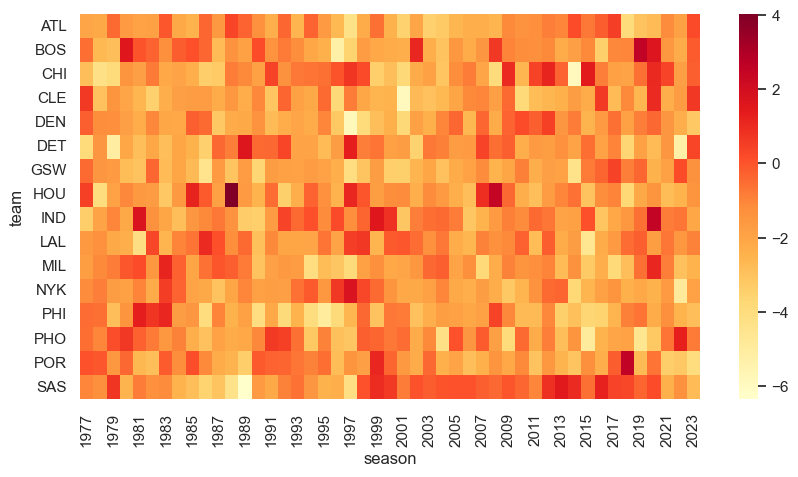

In [69]:
# Filter the data
cluster_plot=clean_df[["season","team","raptor_total"]]

# Plot a pivot table and assign varibale name

cluster_plot=cluster_plot.pivot_table(index="team",columns="season",values="raptor_total")
cluster_plot=cluster_plot.dropna()

# # Plot a heatmap
plt.figure(figsize=(10,5))
sns.set_context("notebook",font_scale=1)
sns.heatmap(cluster_plot, cmap="YlOrRd")
plt.show()

fig=px.imshow(cluster_plot,text_auto=True,aspect="auto",color_continuous_scale='YlOrRd')
fig.update_xaxes(side="top")
fig.show()

### BOXPLOTS

In [70]:
box=clean_df[["player_name","raptor_total","predator_total","pace_impact","season"]].groupby(["player_name","season"])[["raptor_total","predator_total","pace_impact"]]\
            .sum().sort_values(by="pace_impact",ascending=False)

box=box.reset_index()
box.head(2)

player_name  season  raptor_total  predator_total  pace_impact
0    Josh Davis    2006     -8.190017       17.092213    26.834332
1  Chuck Nevitt    1994    -23.886342      -11.543183    23.732063

In [71]:
# IDK HELP

y0=box["raptor_total"]
y1=box["predator_total"]

N=50
fig = go.Figure()
fig.add_trace(go.Box(y=y0, name="raptor total", marker_color = 'indianred',boxpoints="all"))
fig.add_trace(go.Box(y=y1,name="predator total", marker_color = 'lightseagreen',boxpoints="all"))


In [72]:
# top_twenty_raptor["player_name"]

In [98]:
# would have to find a way to shorten code
# got the player names from top raptor players
# filtered by raptor scores
box1=clean_df.raptor_total[clean_df["player_name"]=="LeBron James"]
box2=clean_df.raptor_total[clean_df["player_name"]=="John Stockton"]
box3=clean_df.raptor_total[clean_df["player_name"]=="Chris Paul"]
box4=clean_df.raptor_total[clean_df["player_name"]=="Michael Jordan"]
box5=clean_df.raptor_total[clean_df["player_name"]=="Stephen Curry"]

# made multiple boxplots

trace0=go.Box(
    y = box1,
    name="LeBron James",
    boxpoints="all"
)

trace1=go.Box(
    y = box2,
    name="John Stockton",
     boxpoints="all"
)
trace2=go.Box(
    y = box3,
    name="Chris Paul",
     boxpoints="all"
)
trace3=go.Box(
    y = box4,
    name="Michael Jordan",
     boxpoints="all"
)
trace4=go.Box(
    y = box5,
    name="Stephen Curry",
    boxpoints="all")

# put them together

data=[trace0,trace1,trace2,trace3,trace4]
layout = go.Layout(title="Raptor Scores of Top Players",template="ggplot2",showlegend=False)
fig = go.Figure(data=data, layout=layout)
fig.show()


**Line Plot Comapring LeBron and Kobe**

<AxesSubplot:xlabel='season', ylabel='raptor_total'>

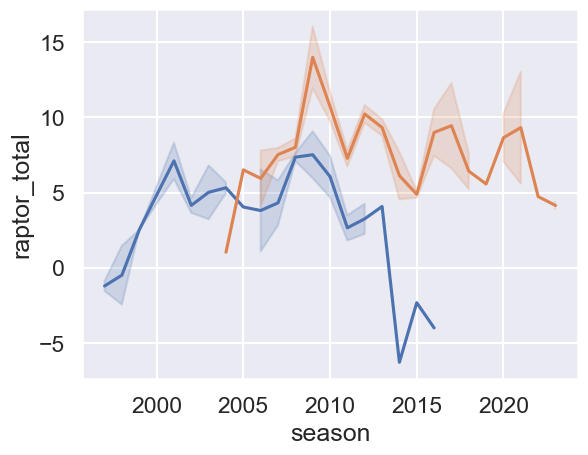

In [75]:
lebron=clean_df[(clean_df["player_name"] == "LeBron James")]

kobe=clean_df[(clean_df["player_name"] == "Kobe Bryant")]


sns.lineplot(data=kobe,x="season",y="raptor_total",legend=True)
sns.lineplot(data=lebron,x="season",y="raptor_total",legend=True)